## old


In [ ]:
import os

import numpy as np
import pandas as pd
import pyDAW

### 读取数据


In [ ]:
# 分别控制文件数量和电压
raw_filess = [
    [
        f"/home/daq/daq_2730/CoMPASS-v2.4.1/SiPM_VUV4/DAQ/VBias{i}/RAW/DataR_CH0@VX2730_53013_VBias{i}_{j}.CSV"
        for j in range(1, 3)
    ]
    for i in range(55, 64)
]

# 读取 CSV 文件，其中分隔符为 ';'
waveforms = []
for raw_files in raw_filess:
    df_combine = []
    for raw_file in raw_files:
        df = pd.read_csv(raw_file, delimiter=";", skiprows=2)
        if df.isna().any().any():
            print(f"文件 {raw_file} 存在 NaN 值")
            # 根据具体需求，可以选择填充或删除缺失值
            # 例如：填充缺失值为 0
            # df = df.fillna(0)
            # 或者删除含有缺失值的行
            df = df.dropna()
        df_combine.append(df)

    array = [df.to_numpy() for df in df_combine]
    waveform = np.concatenate(array, axis=0)
    waveforms.append(waveform)

/tmp/ipykernel_2632636/405022276.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect_peak = patches.Rectangle(
/tmp/ipykernel_2632636/405022276.py:34: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect_charge = patches.Rectangle(


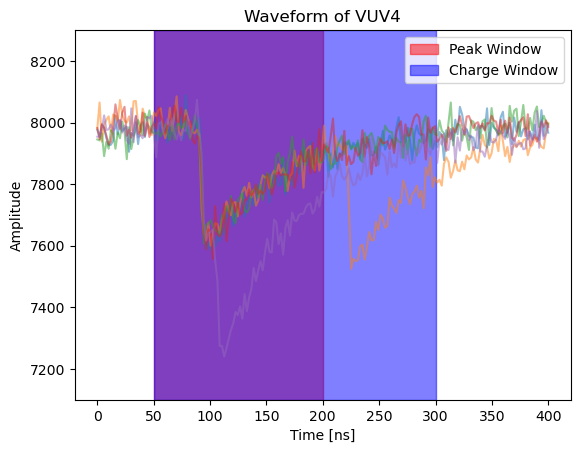

In [ ]:
import matplotlib.patches as patches
from matplotlib import pyplot as plt

arr = waveforms[3]


def plot_waveforms(arr, y_range=[7100, 8300], numbers=5, title="Waveform of VUV4"):
    wave_len = arr[:, 7:].shape[1]

    for j in range(numbers):
        rand_num = np.random.randint(0, arr.shape[0])
        plt.plot(np.linspace(0, 2 * wave_len, wave_len), arr[rand_num, 7:], alpha=0.5)

    plt.title(title)
    plt.xlabel("Time [ns]")
    plt.ylabel("Amplitude")

    plt.ylim(*y_range)

    rect_peak = patches.Rectangle(
        (50, y_range[0]),
        150,
        y_range[1] - y_range[0],
        fill=True,
        edgecolor="r",
        linestyle=None,
        alpha=0.5,
        color="r",
        label="Peak Window",
    )
    plt.gca().add_patch(rect_peak)

    rect_charge = patches.Rectangle(
        (50, y_range[0]),
        250,
        y_range[1] - y_range[0],
        fill=True,
        edgecolor="b",
        linestyle=None,
        alpha=0.5,
        color="b",
        label="Charge Window",
    )
    plt.gca().add_patch(rect_charge)

    plt.legend()
    plt.show()


plot_waveforms(waveforms[3])

In [ ]:
df = pd.read_csv(
    "/home/daq/daq_2730/CoMPASS-v2.4.1/SiPM_VUV4/DAQ/VBias60/RAW/DataR_CH0@VX2730_53013_VBias60_1.CSV",
    delimiter=";",
    skiprows=2,
)

df.shape

In [ ]:
for df in dfs:
    print(f"Shape of df {df.shape}")

In [ ]:
import matplotlib.patches as patches
import numpy as np
from matplotlib import pyplot as plt

# 假设 arr 是已加载的波形数据
arr = waveforms[3]

wave_len = arr[:, 7:].shape[1]

# 创建图形
plt.figure(figsize=(12, 6))

# 绘制波形
for j in range(5):
    plt.plot(
        np.linspace(0, 2 * wave_len, wave_len),
        arr[j, 7:],
        alpha=0.6,
        label=f"Waveform {j + 1}" if j == 0 else "",
    )

# 标题和轴标签
plt.title("Waveform of VUV4", fontsize=16, fontweight="bold")
plt.xlabel("Time [ns]", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)

# 设置 y 轴范围
y_range = [7100, 8300]
plt.ylim(*y_range)

# 添加窗口
rect_peak = patches.Rectangle(
    (50, y_range[0]),
    150,
    y_range[1] - y_range[0],
    fill=True,
    edgecolor="r",
    linestyle="--",
    alpha=0.3,
    color="r",
    label="Peak Window",
)
plt.gca().add_patch(rect_peak)

rect_charge = patches.Rectangle(
    (50, y_range[0]),
    250,
    y_range[1] - y_range[0],
    fill=True,
    edgecolor="b",
    linestyle="--",
    alpha=0.3,
    color="b",
    label="Charge Window",
)
plt.gca().add_patch(rect_charge)

# 启用网格并调整样式
plt.grid(True, linestyle="--", alpha=0.5)

# 设置图例
plt.legend(loc="upper right", fontsize=12, frameon=False)

# 优化布局
plt.tight_layout()

# 显示图形
plt.show()

In [ ]:
arr = waveforms[4]

In [ ]:
arr[:, 7:].shape

In [ ]:
np.min(arr[:, 7:], axis=1).shape
np.mean(arr[:, 7:20], axis=1).shape

In [ ]:
np.mean(arr[:, 7:20], axis=1)

In [ ]:
peak = np.min(arr[:, 7 + 25 : 7 + 100], axis=1) - np.mean(arr[:, 7:20], axis=1)

In [ ]:
%config InlineBackend.figure_format = 'retina'

peak = np.min(arr[:, 7 + 30 : 7 + 70], axis=1) - np.mean(arr[:, 7:20], axis=1)
plt.hist(-peak, bins=np.linspace(-200, 2000, num=170), label="peak")
plt.xlabel("Peak [ADC]")
plt.ylabel("Counts")
plt.title("Peak distribution")

plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
arr[-3:-1, 7 : 7 + 20]

In [ ]:
arr = waveforms[4]
arr.shape

In [ ]:
arr = waveforms[3]
arr[:, 7 + 25 : 7 + 150]
local_mean = np.mean(arr[-3:-1, 7 : 7 + 20], axis=1, keepdims=True)

In [ ]:
arr = waveforms[3]
charge = np.sum(arr[:, 7 + 25 : 7 + 150] - np.mean(arr[:, 7 : 7 + 20]), axis=1)


plt.hist(-charge, bins=np.linspace(0, 5e4, 200), label="Charge")

plt.xlabel("Charge [ADC]")
plt.ylabel("Counts")
plt.title("Charge distribution")
plt.legend()
plt.show()

In [ ]:
waveforms[3].shape

In [ ]:
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

arr = waveforms[3]

In [ ]:
plt.plot(waveforms[3][0, 7:], label="Waveform 1")

### 位置挑选波形

选择 waveform[4] 作为示例电压下的波形


In [ ]:
arr = waveforms[4]
peak = -(np.min(arr[:, 7 + 40 : 7 + 75], axis=1) - np.mean(arr[:, 7:20], axis=1))
charge = -(np.sum(arr[:, 7 + 25 : 7 + 207] - np.mean(arr[:, 7 : 7 + 20]), axis=1))

In [ ]:
import matplotlib.patches as patches
from matplotlib.colors import LogNorm
from pyDAW import scientific_tiker

plt.hist2d(peak, charge, bins=(np.linspace(0, 1500, 150), np.linspace(0, 7e4, 400)), norm=LogNorm())
pos = (350, 0.5e4)
shape = (200, 1e4)

rect_peak = patches.Rectangle(
    pos,
    *shape,
    fill=True,
    edgecolor="r",
    linestyle="--",
    alpha=0.3,
    color="r",
    label="Peak Window",
)

plt.gca().add_patch(rect_peak)

plt.ylabel("Charge [ADC]")
plt.xlabel("Peak [ADC]")

scientific_tiker([plt.gca()])
plt.title("Peak vs Charge Distribution")
plt.colorbar()
# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 mask 已经定义并且 waveforms 数据已经加载
# mask 是一个布尔数组，用于筛选数据

mask = (
    (peak > pos[0]) & (peak < pos[0] + shape[0]) & (charge > pos[1]) & (charge < pos[1] + shape[1])
)

wave2 = waveforms[4][mask, :]

# 获取波形长度（根据实际数据的维度）
wave_len = wave2.shape[1] - 7  # 这里假设数据从第7列开始有效

# 创建一个合适的时间轴
time = np.linspace(0, 400, wave_len)  # 时间从 0 到 400，长度与波形一致

# 绘制前5个波形
plt.figure(figsize=(6, 5))  # 设置图形尺寸
plt.plot(time, wave2[:100, 7:].T, label="Waveform 1", alpha=0.7)


plt.title("Waveform of VUV4")
plt.xlabel("Time [ns]")
plt.ylabel("Amplitude")

plt.ylim(6000, 8250)

# plt.legend(loc="upper right", fontsize=12)

# 显示网格
plt.grid(True, linestyle="--", alpha=0.5)

# 显示图形
plt.tight_layout()
plt.show()

In [ ]:
len(charge[mask]) / len(charge)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(charge, bins=np.linspace(0, 1e5, 300), label="Raw", histtype="step")
ax1.hist(charge[mask], bins=np.linspace(0, 1e5, 300), label="Box Cut", histtype="step")
ax1.set_xlabel("Charge [ADC]")
ax1.set_ylabel("Counts")
ax1.set_title("Charge Distribution")
ax1.set_yscale("log")
ax1.legend()

# bins=np.linspace(0, 1500, 1500)
ax2.hist(peak, bins=np.linspace(0, 1500, 300), label="Raw", histtype="step")
ax2.hist(peak[mask], bins=np.linspace(0, 1500, 300), label="Box Cut", histtype="step")
ax2.set_xlabel("Peak [ADC]")
ax2.set_ylabel("Counts")
ax2.set_yscale("log")
ax2.set_title("Peak Distribution")

plt.show()

In [ ]:
from pyDAW import SiPM

In [ ]:
arr[:, 7:].shape
arr

In [ ]:
from matplotlib.colors import LogNorm

num = 100000
a = []
for i in range(num):
    a.append(np.linspace(2, 400, 200))

a = np.array(object=a).flatten()

plt.hist2d(
    a,
    arr[:num, 7:].flatten(),
    bins=[np.linspace(0, 400, 200), np.linspace(6500, 8200, 170)],
    norm=LogNorm(),
)


plt.xlabel("Time [ns]")
plt.ylabel("ADC")
plt.title("Waveform Pile Up")


plt.show()

In [ ]:
4 / 2**14 * 1000

### 重点看看多电压的分析


In [ ]:
arr = waveforms[8]
peak = -(np.min(arr[:, 7 + 40 : 7 + 75], axis=1) - np.mean(arr[:, 7:20], axis=1))
charge = -(np.sum(arr[:, 7 + 25 : 7 + 207] - np.mean(arr[:, 7 : 7 + 20]), axis=1))

In [ ]:
plt.hist2d(
    peak, charge, bins=(np.linspace(0, 1500, 150), np.linspace(-1e4, 7e4, 400)), norm=LogNorm()
)

plt.show()

In [ ]:
plot_waveforms(waveforms[1], y_range=[6000, 8200], numbers=10, title="VBias 60V Waveform")

## new data 更多电压下的


In [ ]:
import os

import numpy as np
import pandas as pd

# 分别控制文件数量和电压
raw_filess = [
    [
        f"/home/daq/daq_2730/CoMPASS-v2.4.1/SiPM_VUV4/DAQ/VBias{i}/RAW/DataR_CH0@VX2730_53013_VBias{i}_{j}.CSV"
        for j in range(1, 3)
    ]
    for i in range(55, 64)
]

# 读取 CSV 文件，其中分隔符为 ';'
waveform_all = []
for raw_files in raw_filess:
    df_combine = []
    for raw_file in raw_files:
        try:
            if os.path.exists(raw_file):
                df = pd.read_csv(raw_file, delimiter=";", skiprows=1)
                df_combine.append(df)
            else:
                print(f"文件不存在: {raw_file}")
        except Exception as e:
            print(f"读取文件时出错: {raw_file}, 错误信息: {e}")
    if df_combine:
        waveforms = [df.to_numpy() for df in df_combine]
        waveform_total = np.concatenate(waveforms, axis=0)
        waveform_all.append(waveform_total)


waveforms = waveform_all

waveform_total


In [ ]:
waveforms = waveform_all

### 计算 2D Histogram waveforms of the same length


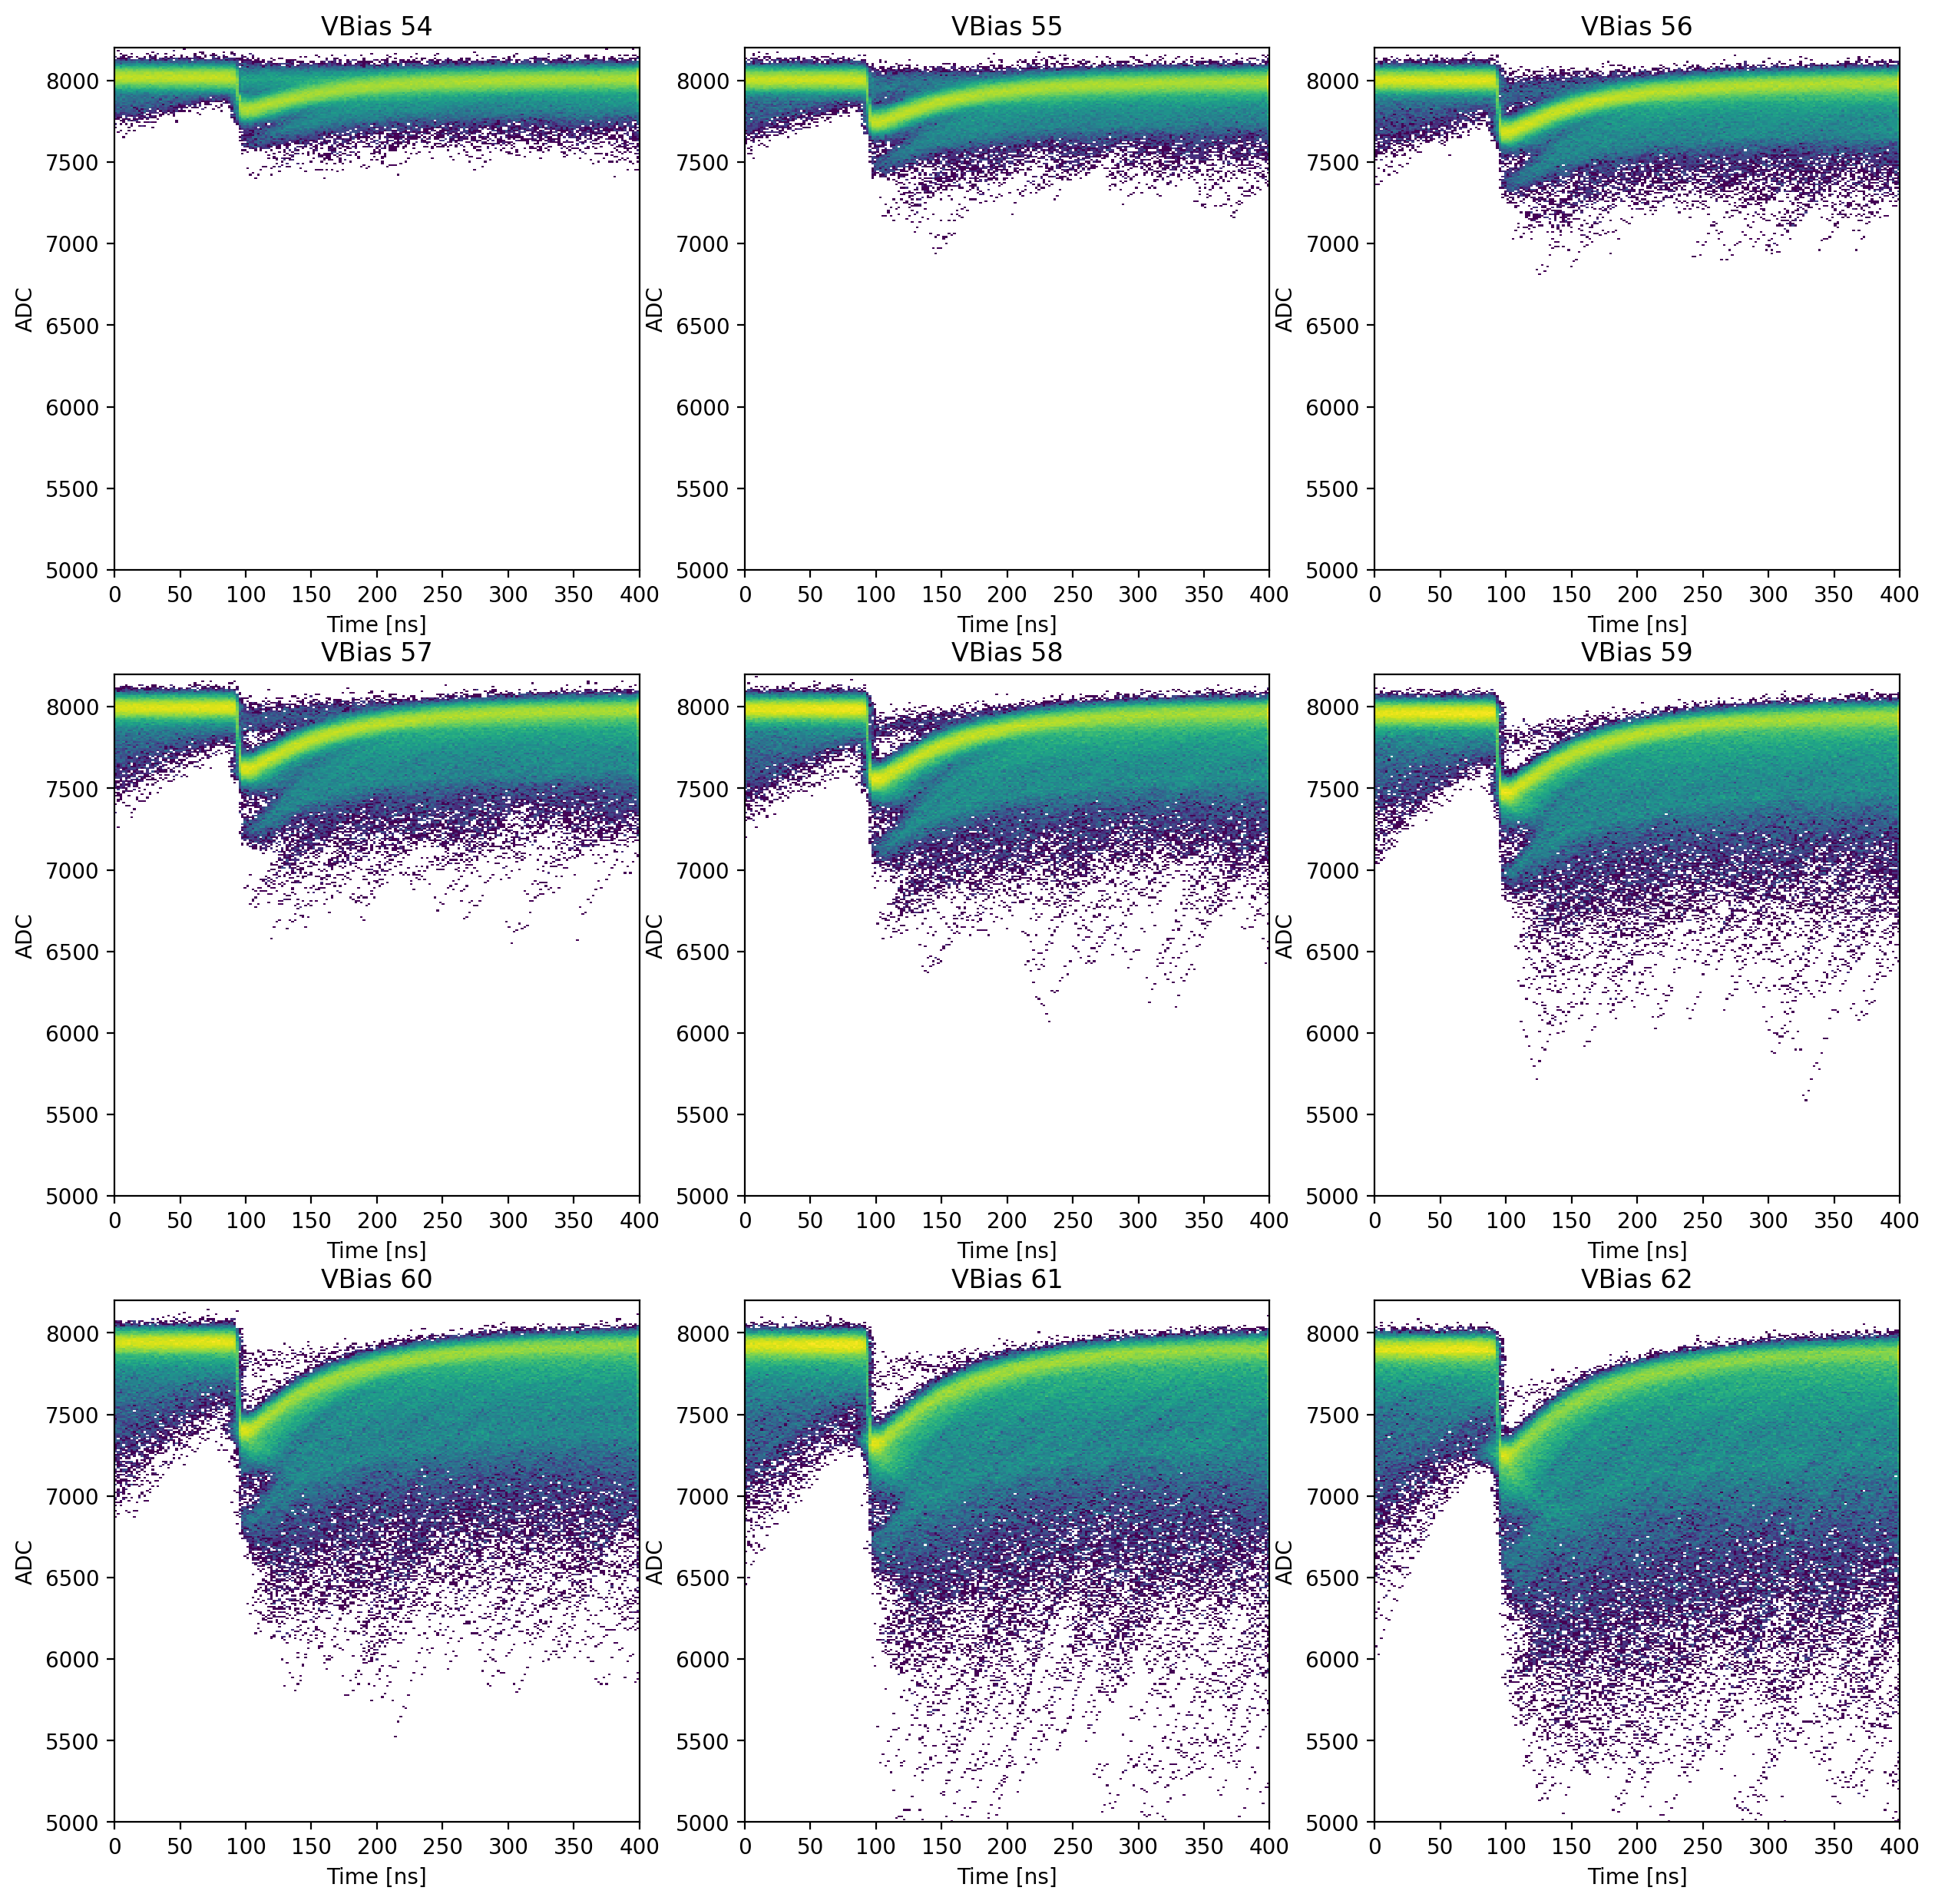

In [2]:
%config InlineBackend.figure_format = 'retina'
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

num = 2000
a = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))


a = []
for i in range(num):
    a.append(np.linspace(2, 400, 200))
    b = np.array(object=a).flatten()


hist_data = []
for j, waveform in enumerate(waveforms):
    row = j // 3
    col = j % 3
    ax = axes[row, col]

    hist = ax.hist2d(
        b,
        waveform[:num, 7:].flatten(),
        bins=[np.linspace(0, 400, 200), np.linspace(5000, 8200, 320)],
        norm=LogNorm(),
    )
    # Save the histogram data (counts, edges)
    counts, xedges, yedges, obj = hist
    hist_data.append({"counts": counts, "xedges": xedges, "yedges": yedges})

    ax.set_xlabel("Time [ns]")
    ax.set_ylabel("ADC")
    ax.set_title(f"VBias {54 + j}")


# Save histograms data to a file using pickle
with open("histogram_data.pkl", "wb") as f:
    pickle.dump(hist_data, f)

plt.show()

### 波形分析尝试


In [ ]:
np.diff(waveform[:num, 7:], axis=1).shape

(2000, 199)

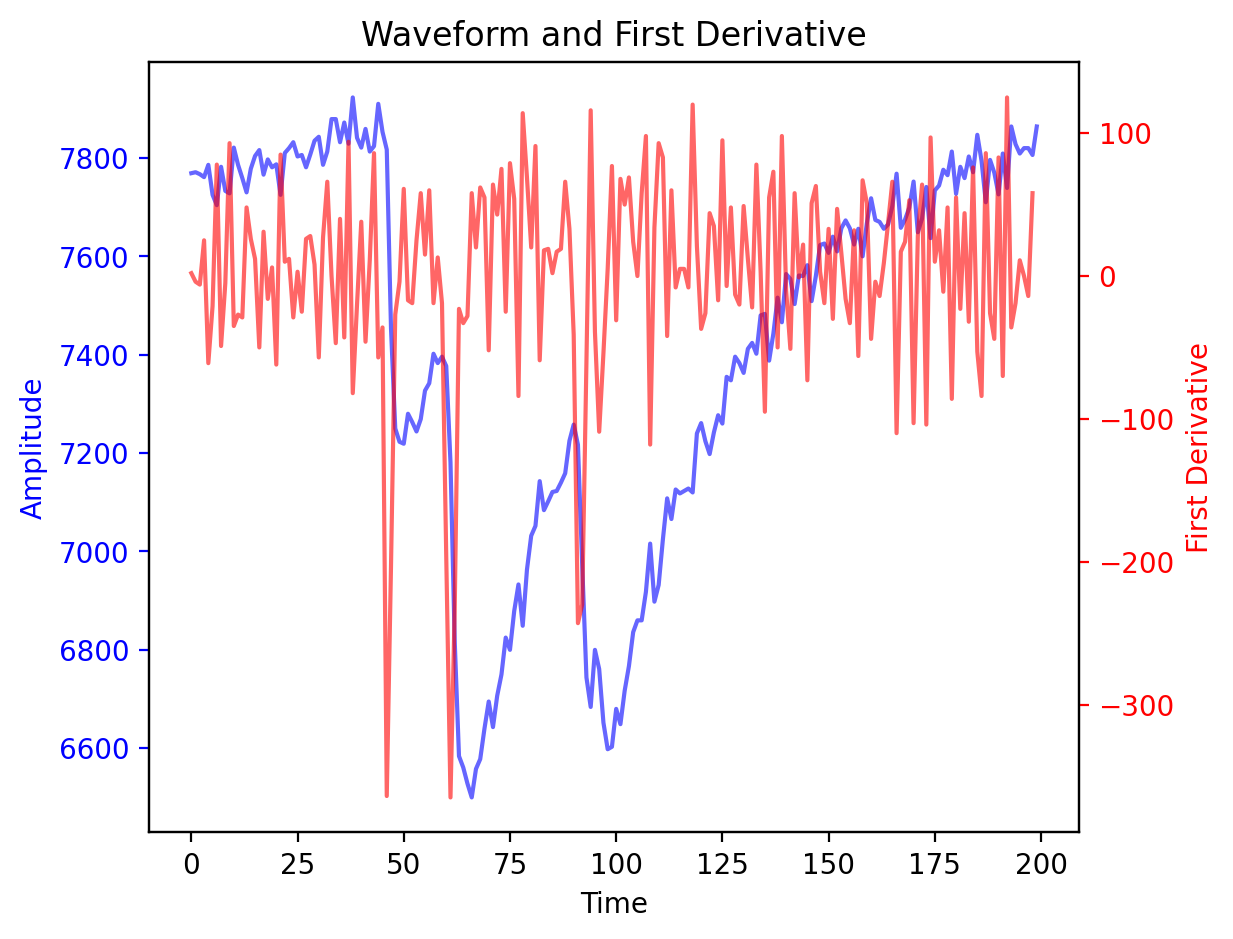

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个figure和axis对象
fig, ax1 = plt.subplots(figsize=(6, 5))


waveform = waveforms[7]
rand = np.random.randint(0, 2000)
wave = waveform[rand, 7:]

# 画出第一个波形
ax1.plot(wave.flatten(), label="Raw Waveform", color="blue", alpha=0.6)
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude", color="blue")
ax1.tick_params("y", colors="blue")

# 创建第二个y轴，共享x轴
ax2 = ax1.twinx()

# 计算一阶导数

# 画出一阶导数
ax2.plot(np.diff(wave).flatten(), color="red", label="Diff", alpha=0.6)
ax2.set_ylabel("First Derivative", color="red")
ax2.tick_params("y", colors="red")


plt.title("Waveform and First Derivative")
plt.show()

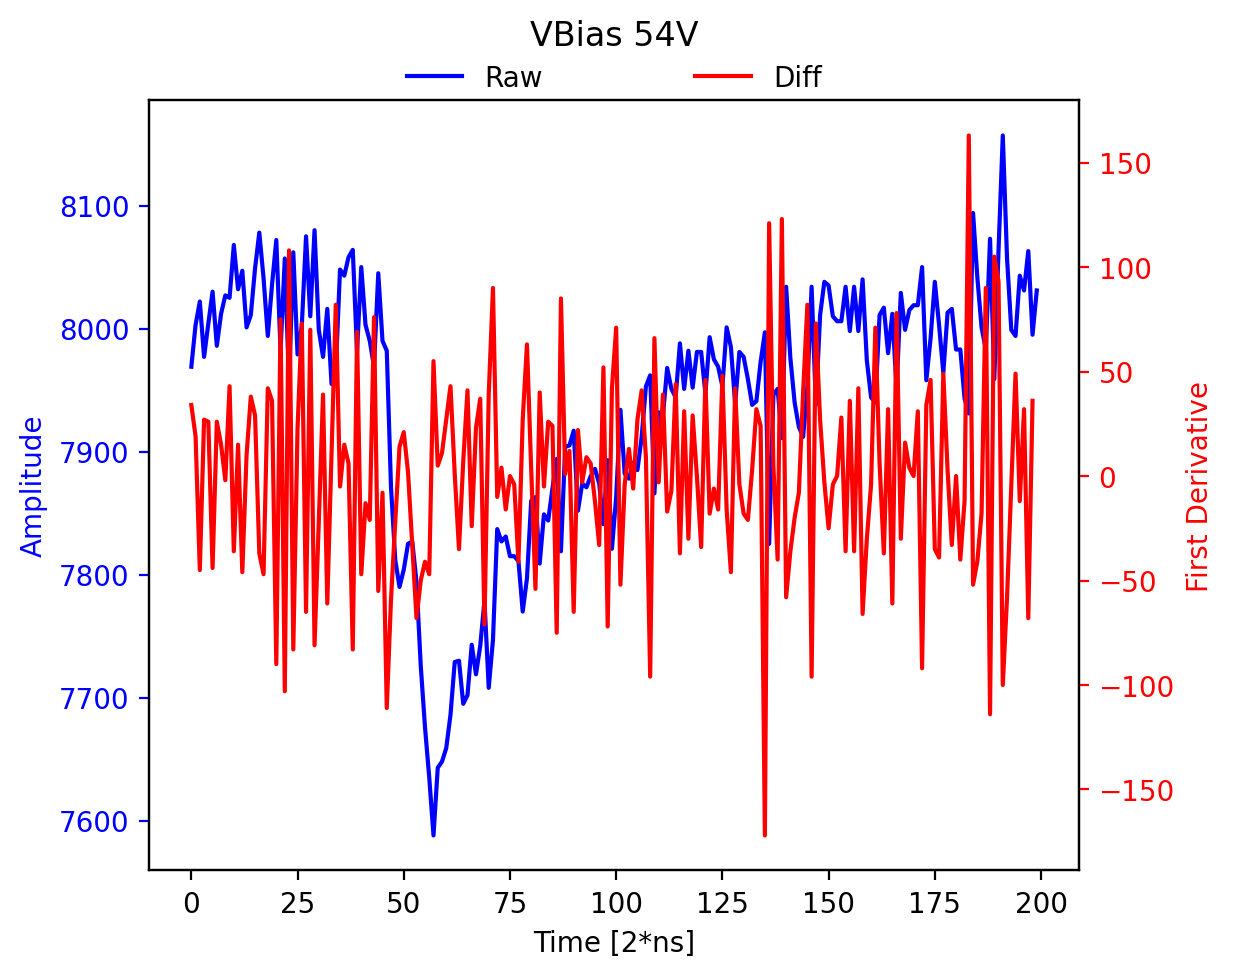

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# 创建一个figure和axis对象
fig, ax1 = plt.subplots(figsize=(6, 5))
j = 0

waveform = waveforms[j]
rand = np.random.randint(0, 2000)
wave = waveform[rand, 7:]

# 画出第一个波形
ax1.plot((wave).flatten(), label="Raw", color="blue", alpha=1)
ax1.set_xlabel("Time [2*ns]")
ax1.set_ylabel("Amplitude", color="blue")
ax1.tick_params("y", colors="blue")


ax1.plot()
# 创建第二个y轴，共享x轴
ax2 = ax1.twinx()

# 计算一阶导数
diff_waveform = np.diff(wave, axis=0).flatten()

# 应用Savitzky-Golay滤波
window_size = 5
poly_order = 2
smooth_diff = savgol_filter(diff_waveform, window_size, poly_order)


# 画出平滑后的一阶导数
ax2.plot(diff_waveform, color="red", label="Diff", alpha=1)

ax2.set_ylabel("First Derivative", color="red")
ax2.tick_params("y", colors="red")


ax1.legend(loc="upper left", bbox_to_anchor=(0.25, 1.08), frameon=False)  # 移除边框
ax2.legend(loc="upper right", bbox_to_anchor=(0.75, 1.08), frameon=False)  # 移除边框

plt.title(f"VBias {54 + j}V", x=0.5, y=1.05)
plt.show()

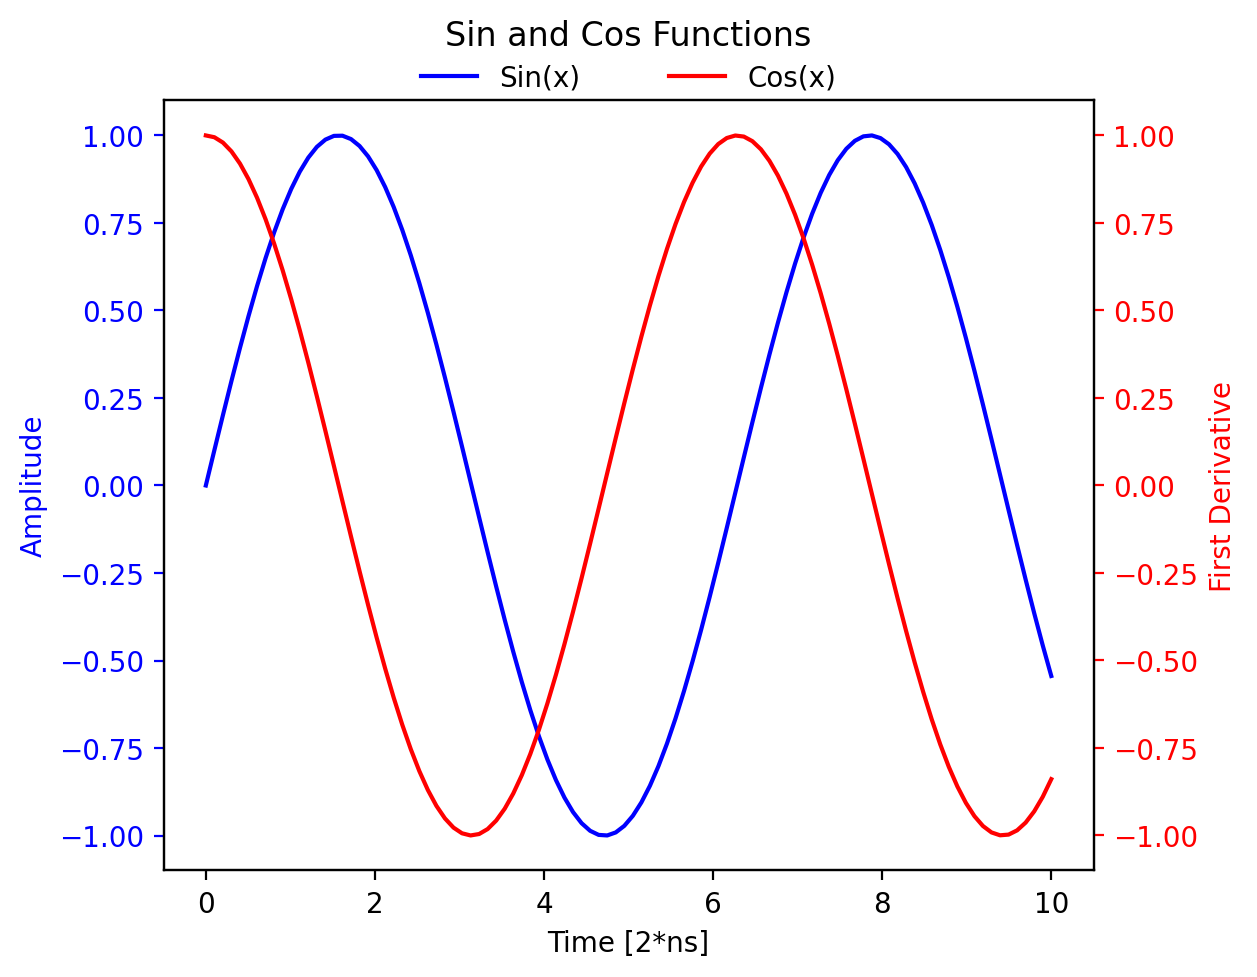

(<Figure size 600x500 with 2 Axes>,
 (<Axes: xlabel='Time [2*ns]', ylabel='Amplitude'>,
  <Axes: title={'center': 'Sin and Cos Functions'}, ylabel='First Derivative'>))

In [ ]:
import matplotlib.pyplot as plt


def plot_dual_y(
    x,
    y1,
    y2,
    label1,
    label2,
    title,
    xlabel="Time [2*ns]",
    ylabel1="Amplitude",
    ylabel2="First Derivative",
):
    """
    绘制双y轴图。

    参数：
    - x: x轴数据。
    - y1: 第一组y数据（用于左边的y轴）。
    - y2: 第二组y数据（用于右边的y轴）。
    - label1: 第一组y数据的标签。
    - label2: 第二组y数据的标签。
    - title: 图形的标题。
    - xlabel: x轴的标签，默认为 'Time [2*ns]'。
    - ylabel1: 左y轴的标签，默认为 'Amplitude'。
    - ylabel2: 右y轴的标签，默认为 'First Derivative'。
    """
    # 创建一个figure和axis对象
    fig, ax1 = plt.subplots(figsize=(6, 5))

    # 画出第一组数据（y1）
    ax1.plot(x, y1, label=label1, color="blue")
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1, color="blue")
    ax1.tick_params("y", colors="blue")

    # 创建第二个y轴，共享x轴
    ax2 = ax1.twinx()

    # 画出第二组数据（y2）
    ax2.plot(x, y2, label=label2, color="red")
    ax2.set_ylabel(ylabel2, color="red")
    ax2.tick_params("y", colors="red")

    # 添加图例
    ax1.legend(loc="upper left", bbox_to_anchor=(0.25, 1.08), frameon=False)  # 移除边框
    ax2.legend(loc="upper right", bbox_to_anchor=(0.75, 1.08), frameon=False)  # 移除边框

    # 设置标题
    plt.title(title, x=0.5, y=1.05)

    # 显示图形
    plt.show()
    return fig, (ax1, ax2)


# 示例用法：
# 假设你有如下数据
x = np.linspace(0, 10, 100)
y1 = np.sin(x)  # 第一组数据
y2 = np.cos(x)  # 第二组数据

# 调用函数绘图
plot_dual_y(x, y1, y2, label1="Sin(x)", label2="Cos(x)", title="Sin and Cos Functions")

In [ ]:
wave_1.shape
wave_2_sum.shape

(200,)

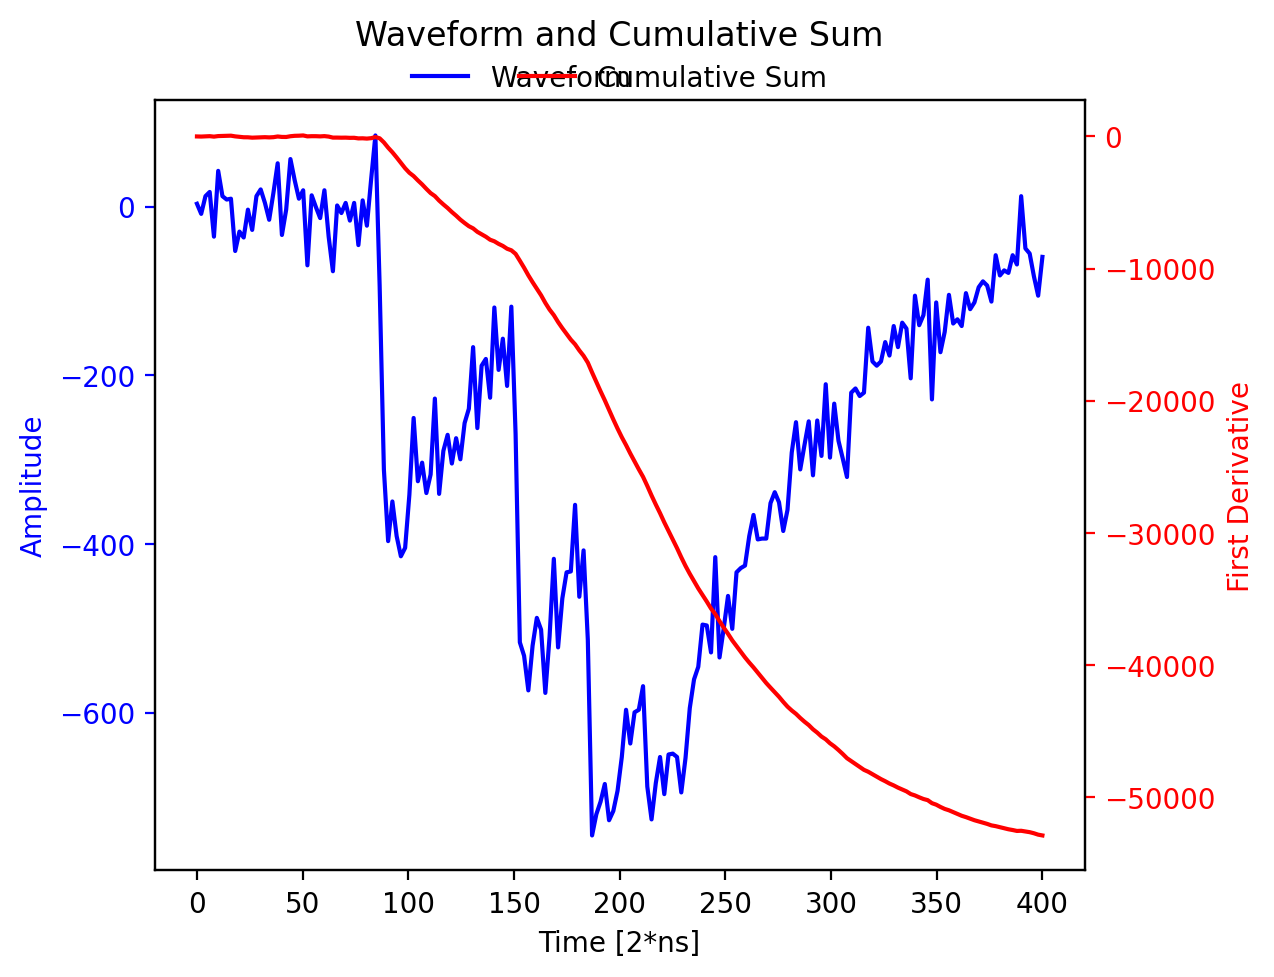

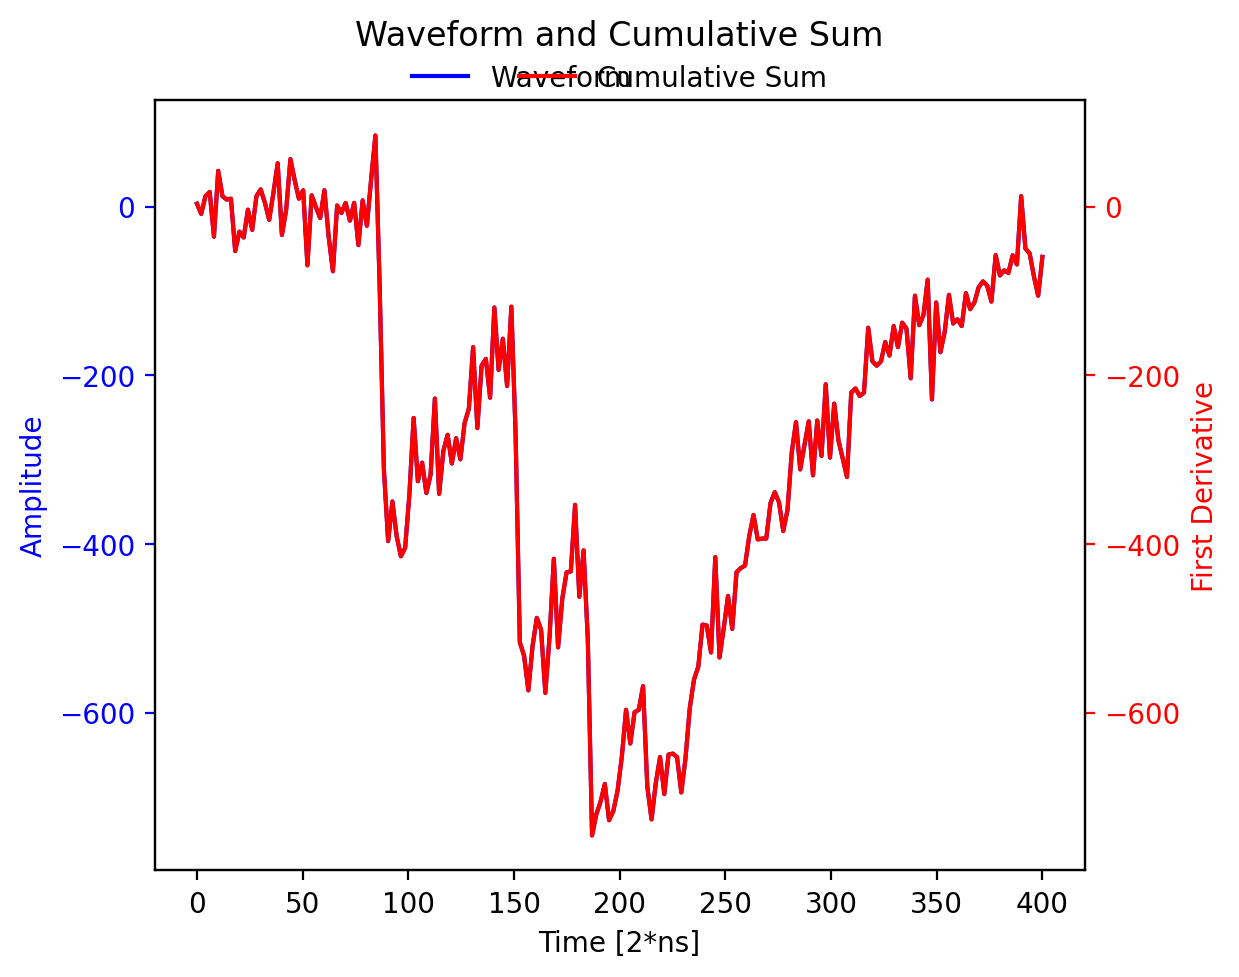

(<Figure size 600x500 with 2 Axes>,
 (<Axes: xlabel='Time [2*ns]', ylabel='Amplitude'>,
  <Axes: title={'center': 'Waveform and Cumulative Sum'}, ylabel='First Derivative'>))

In [ ]:
j = 3
waveform = waveforms[j]
rand = np.random.randint(0, 2000)
wave = waveform[rand, 7:]

wave_1 = wave - np.mean(wave[:20])

wave_2_sum = np.cumsum(wave_1)
delay = 0
baseline = np.full(delay, np.mean(wave[:20]))
wave_baseline = np.concatenate([baseline, wave_1[delay:]])

plot_dual_y(
    x=np.linspace(0, 400, 200),
    y1=wave_1,
    y2=wave_2_sum,
    label1="Waveform",
    label2="Cumulative Sum",
    title="Waveform and Cumulative Sum",
)

plot_dual_y(
    x=np.linspace(0, 400, 200),
    y1=wave_1,
    y2=wave_baseline,
    label1="Waveform",
    label2="Cumulative Sum",
    title="Waveform and Cumulative Sum",
)

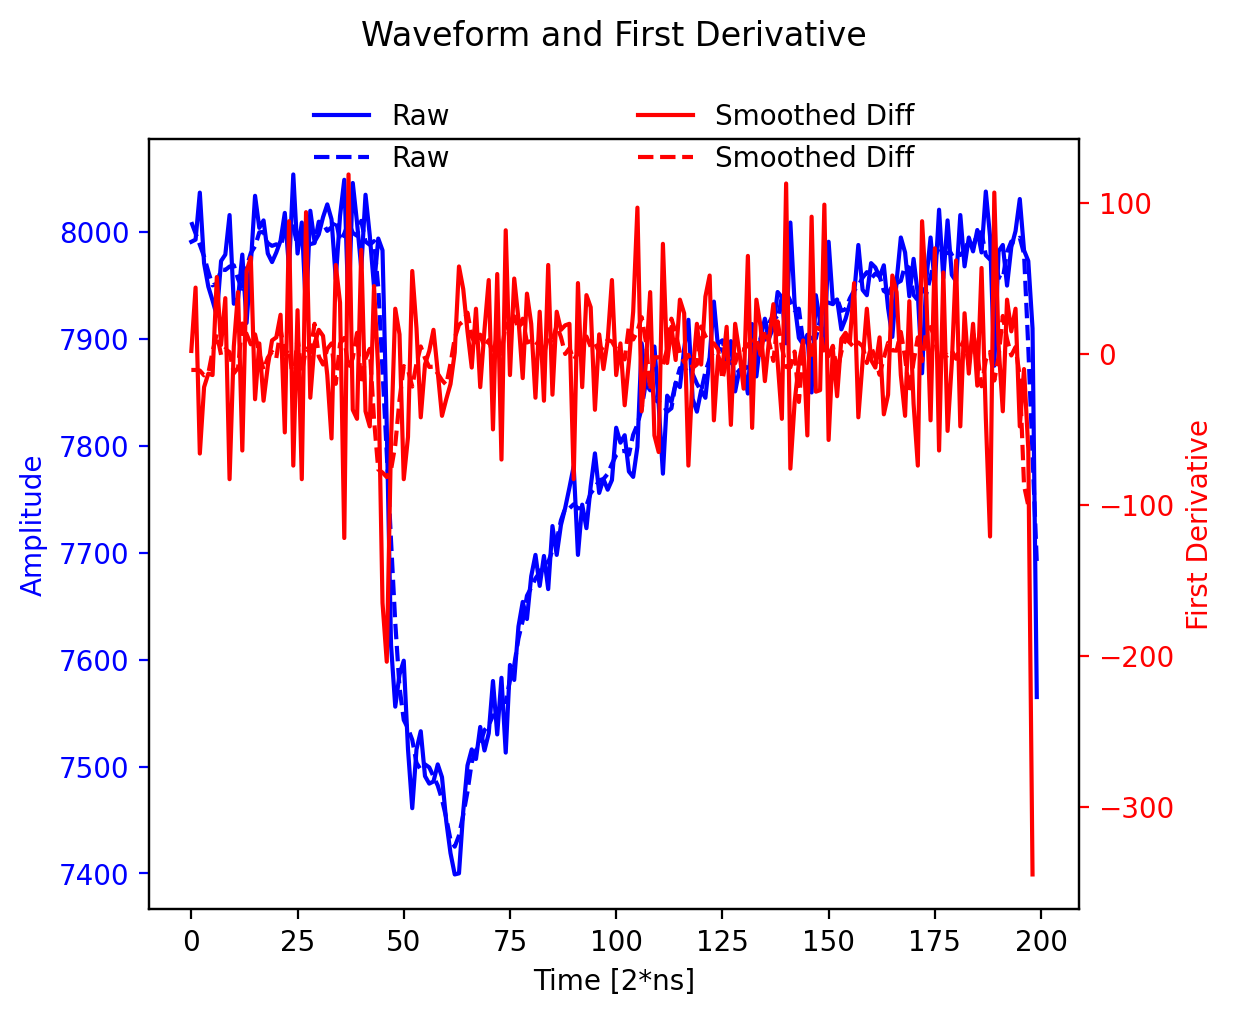

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# 创建一个figure和axis对象
fig, ax1 = plt.subplots(figsize=(6, 5))


# 应用Savitzky-Golay滤波
window_size = 5
poly_order = 1


waveform = waveforms[4]
rand = np.random.randint(0, 2000)
wave = waveform[rand, 7:]


wave_filter = savgol_filter(wave, window_size, poly_order)
# 画出第一个波形
ax1.plot((wave).flatten(), label="Raw", color="blue")
ax1.plot((wave_filter).flatten(), label="Raw", color="blue", linestyle="--")
ax1.set_xlabel("Time [2*ns]")
ax1.set_ylabel("Amplitude", color="blue")
ax1.tick_params("y", colors="blue")


# 创建第二个y轴，共享x轴
ax2 = ax1.twinx()

# 计算一阶导数
diff_waveform = np.diff(wave, axis=0).flatten()

smooth_diff = np.diff(wave_filter, axis=0).flatten()


# 画出平滑后的一阶导数
ax2.plot(diff_waveform, color="red", label="Smoothed Diff")
ax2.plot(smooth_diff, color="red", label="Smoothed Diff", linestyle="--")

ax2.set_ylabel("First Derivative", color="red")
ax2.tick_params("y", colors="red")


ax1.legend(loc="upper left", bbox_to_anchor=(0.15, 1.08), frameon=False)  # 移除边框
ax2.legend(loc="upper right", bbox_to_anchor=(0.85, 1.08), frameon=False)  # 移除边框

plt.title("Waveform and First Derivative", x=0.5, y=1.1)
plt.show()

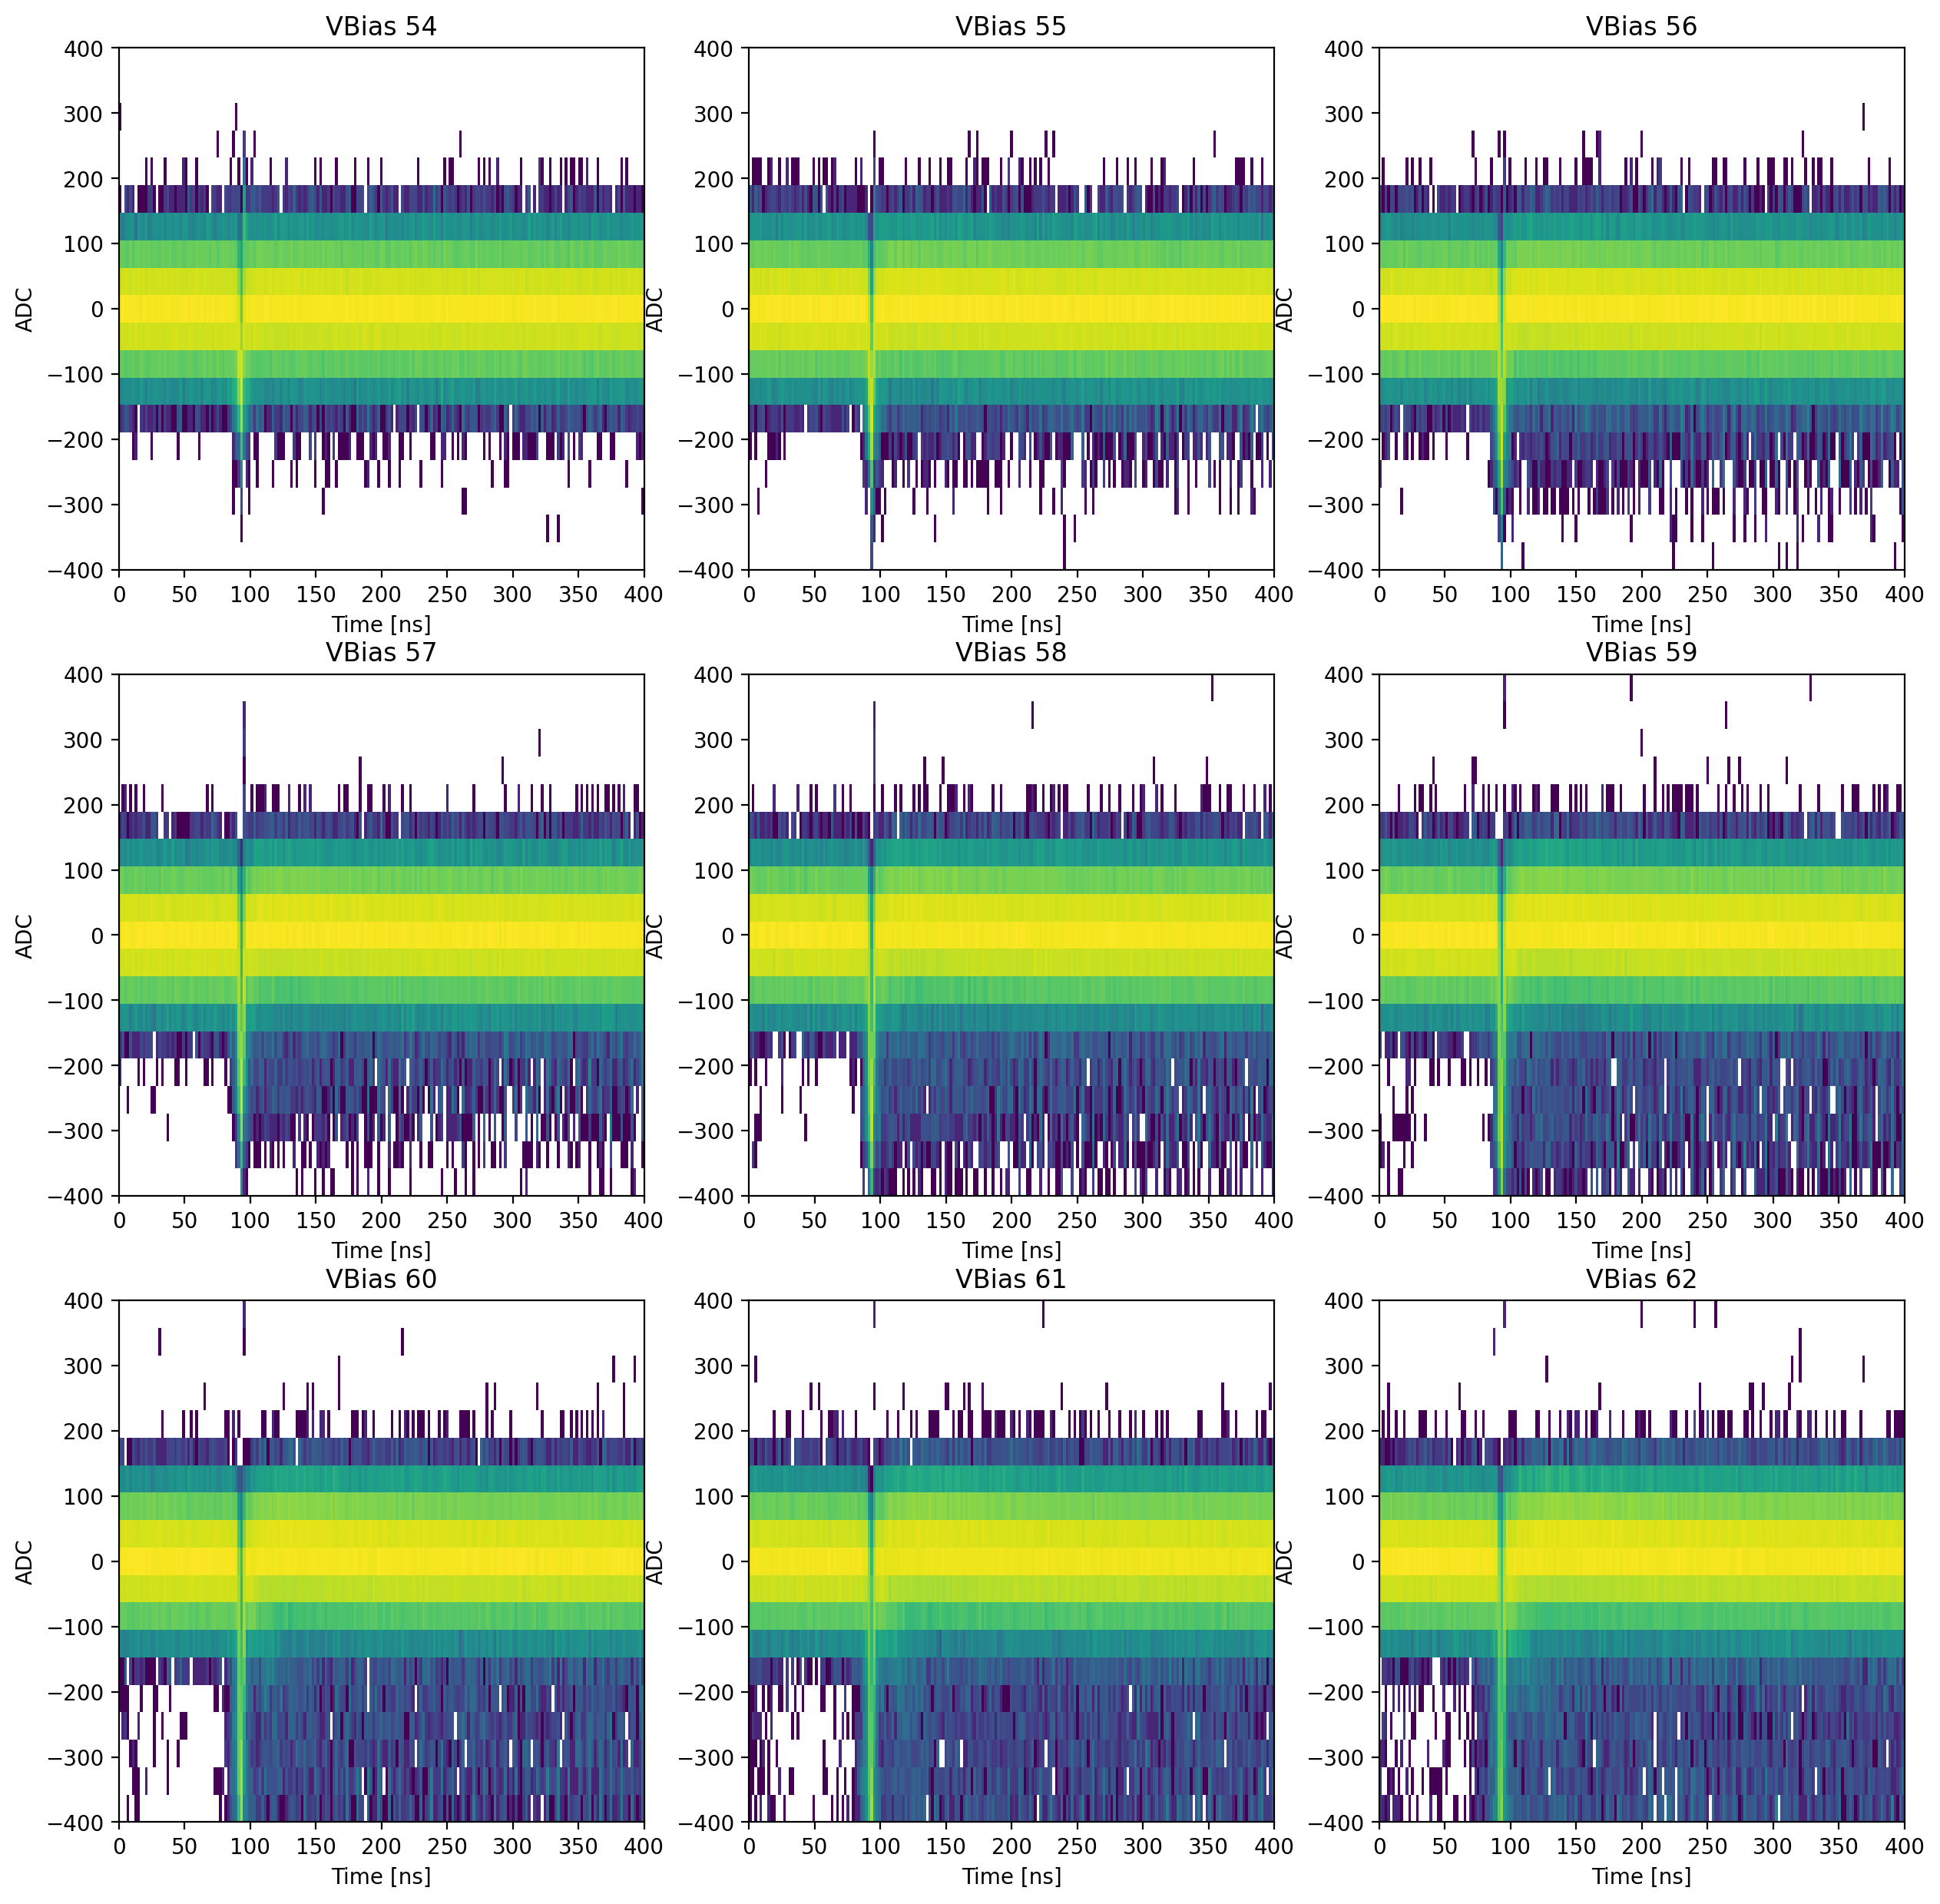

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

num = 2000
a = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))


a = []
for i in range(num):
    a.append(np.linspace(2, 400, num=199))
    b = np.array(object=a).flatten()


hist_data = []
for j, waveform in enumerate(waveforms):
    row = j // 3
    col = j % 3
    ax = axes[row, col]

    hist = ax.hist2d(
        b,
        np.diff(waveform[:num, 7:], axis=1).flatten(),
        bins=[np.linspace(0, 400, 200), np.linspace(-400, 400, 20)],
        norm=LogNorm(),
    )
    # Save the histogram data (counts, edges)
    counts, xedges, yedges, obj = hist
    hist_data.append({"counts": counts, "xedges": xedges, "yedges": yedges})

    ax.set_xlabel("Time [ns]")
    ax.set_ylabel("ADC")
    ax.set_title(f"VBias {54 + j}")


# Save histograms data to a file using pickle
with open("histogram_data.pkl", "wb") as f:
    pickle.dump(hist_data, f)

plt.show()

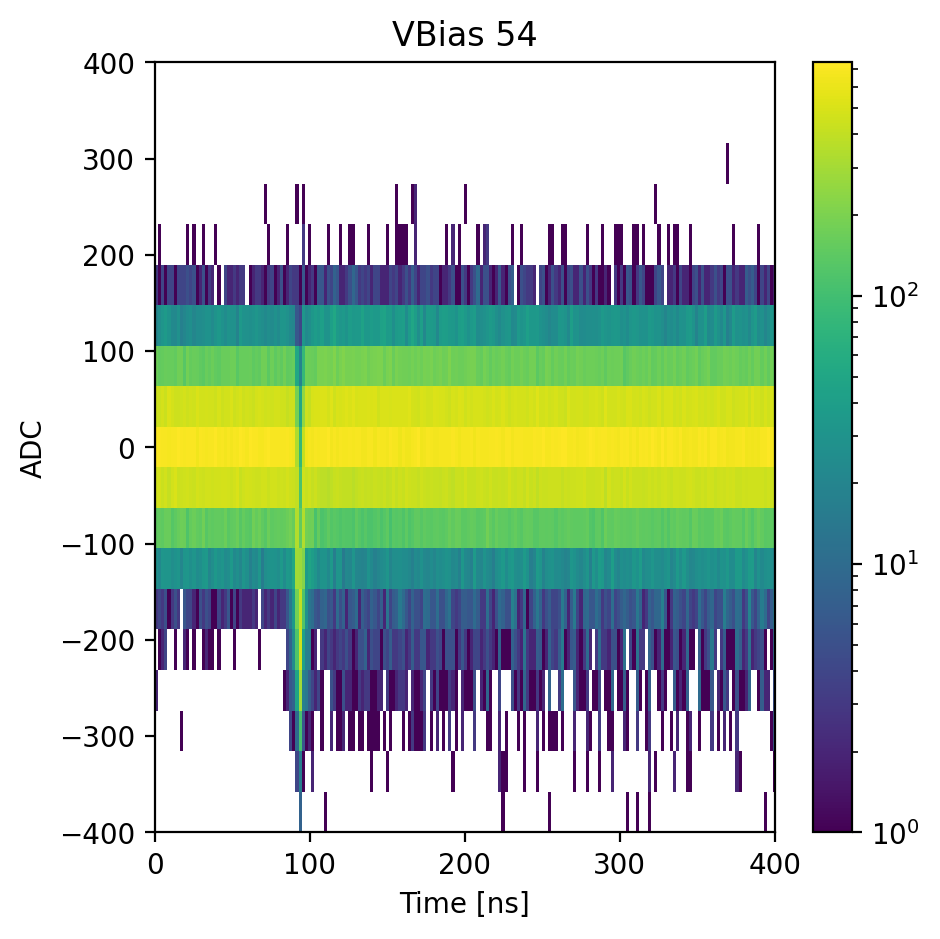

In [ ]:
import pickle

# 从 pickle 文件中读取数据
with open("histogram_data.pkl", "rb") as f:
    loaded_hist_data = pickle.load(f)

# 现在 loaded_hist_data 包含了之前保存的直方图数据
# 你可以像之前一样使用这些数据进行绘图或其他分析

# 示例：绘制第一个直方图
first_hist = loaded_hist_data[2]
counts = first_hist["counts"]
xedges = first_hist["xedges"]
yedges = first_hist["yedges"]

# 创建 figure 和 axes
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# 绘制 2D 直方图
im = ax.imshow(
    counts.T,
    origin="lower",
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    aspect="auto",
    norm=LogNorm(),
)

# 设置标签和标题
ax.set_xlabel("Time [ns]")
ax.set_ylabel("ADC")
ax.set_title("VBias 54")

# 显示颜色条
fig.colorbar(im, ax=ax)

# 显示图像
plt.show()

In [ ]:
peak = np.min(waveform[:num, 7 + 25 : 7 + 100], axis=1) - np.floor(
    np.mean(waveform[:num, 7:20], axis=1)
)
charge = np.sum(waveform[:num, 7 + 25 : 7 + 150] - np.mean(waveform[:num, 7 : 7 + 10]), axis=1)

### 生成对应的数据


In [ ]:
peaks = [
    np.min(waveform[: len(waveform), 7 + 25 : 7 + 100], axis=1)
    - np.floor(np.mean(waveform[: len(waveform), 7:20], axis=1))
    for waveform in waveforms
]

charges = [
    np.sum(
        waveform[: len(waveform), 7 + 25 : 7 + 150]
        - np.mean(waveform[: len(waveform), 7 : 7 + 10]),
        axis=1,
    )
    for waveform in waveforms
]

KeyboardInterrupt: 

In [ ]:
import pickle as pkl

# 将计算结果保存到缓存文件
with open("charges.pkl", "wb") as f:
    pkl.dump(charges, f)
with open("peaks.pkl", "wb") as f:
    pkl.dump(peaks, f)

### 读取计算得到的文件


In [ ]:
import pickle as pkl

with open("charges.pkl", "rb") as f:
    charges = pkl.load(f)
with open("peaks.pkl", "rb") as f:
    peaks = pkl.load(f)

In [ ]:
charges[0]

### 通过数据进行计算


In [ ]:
plt.plot(waveforms[8][1:10, 7:].T)

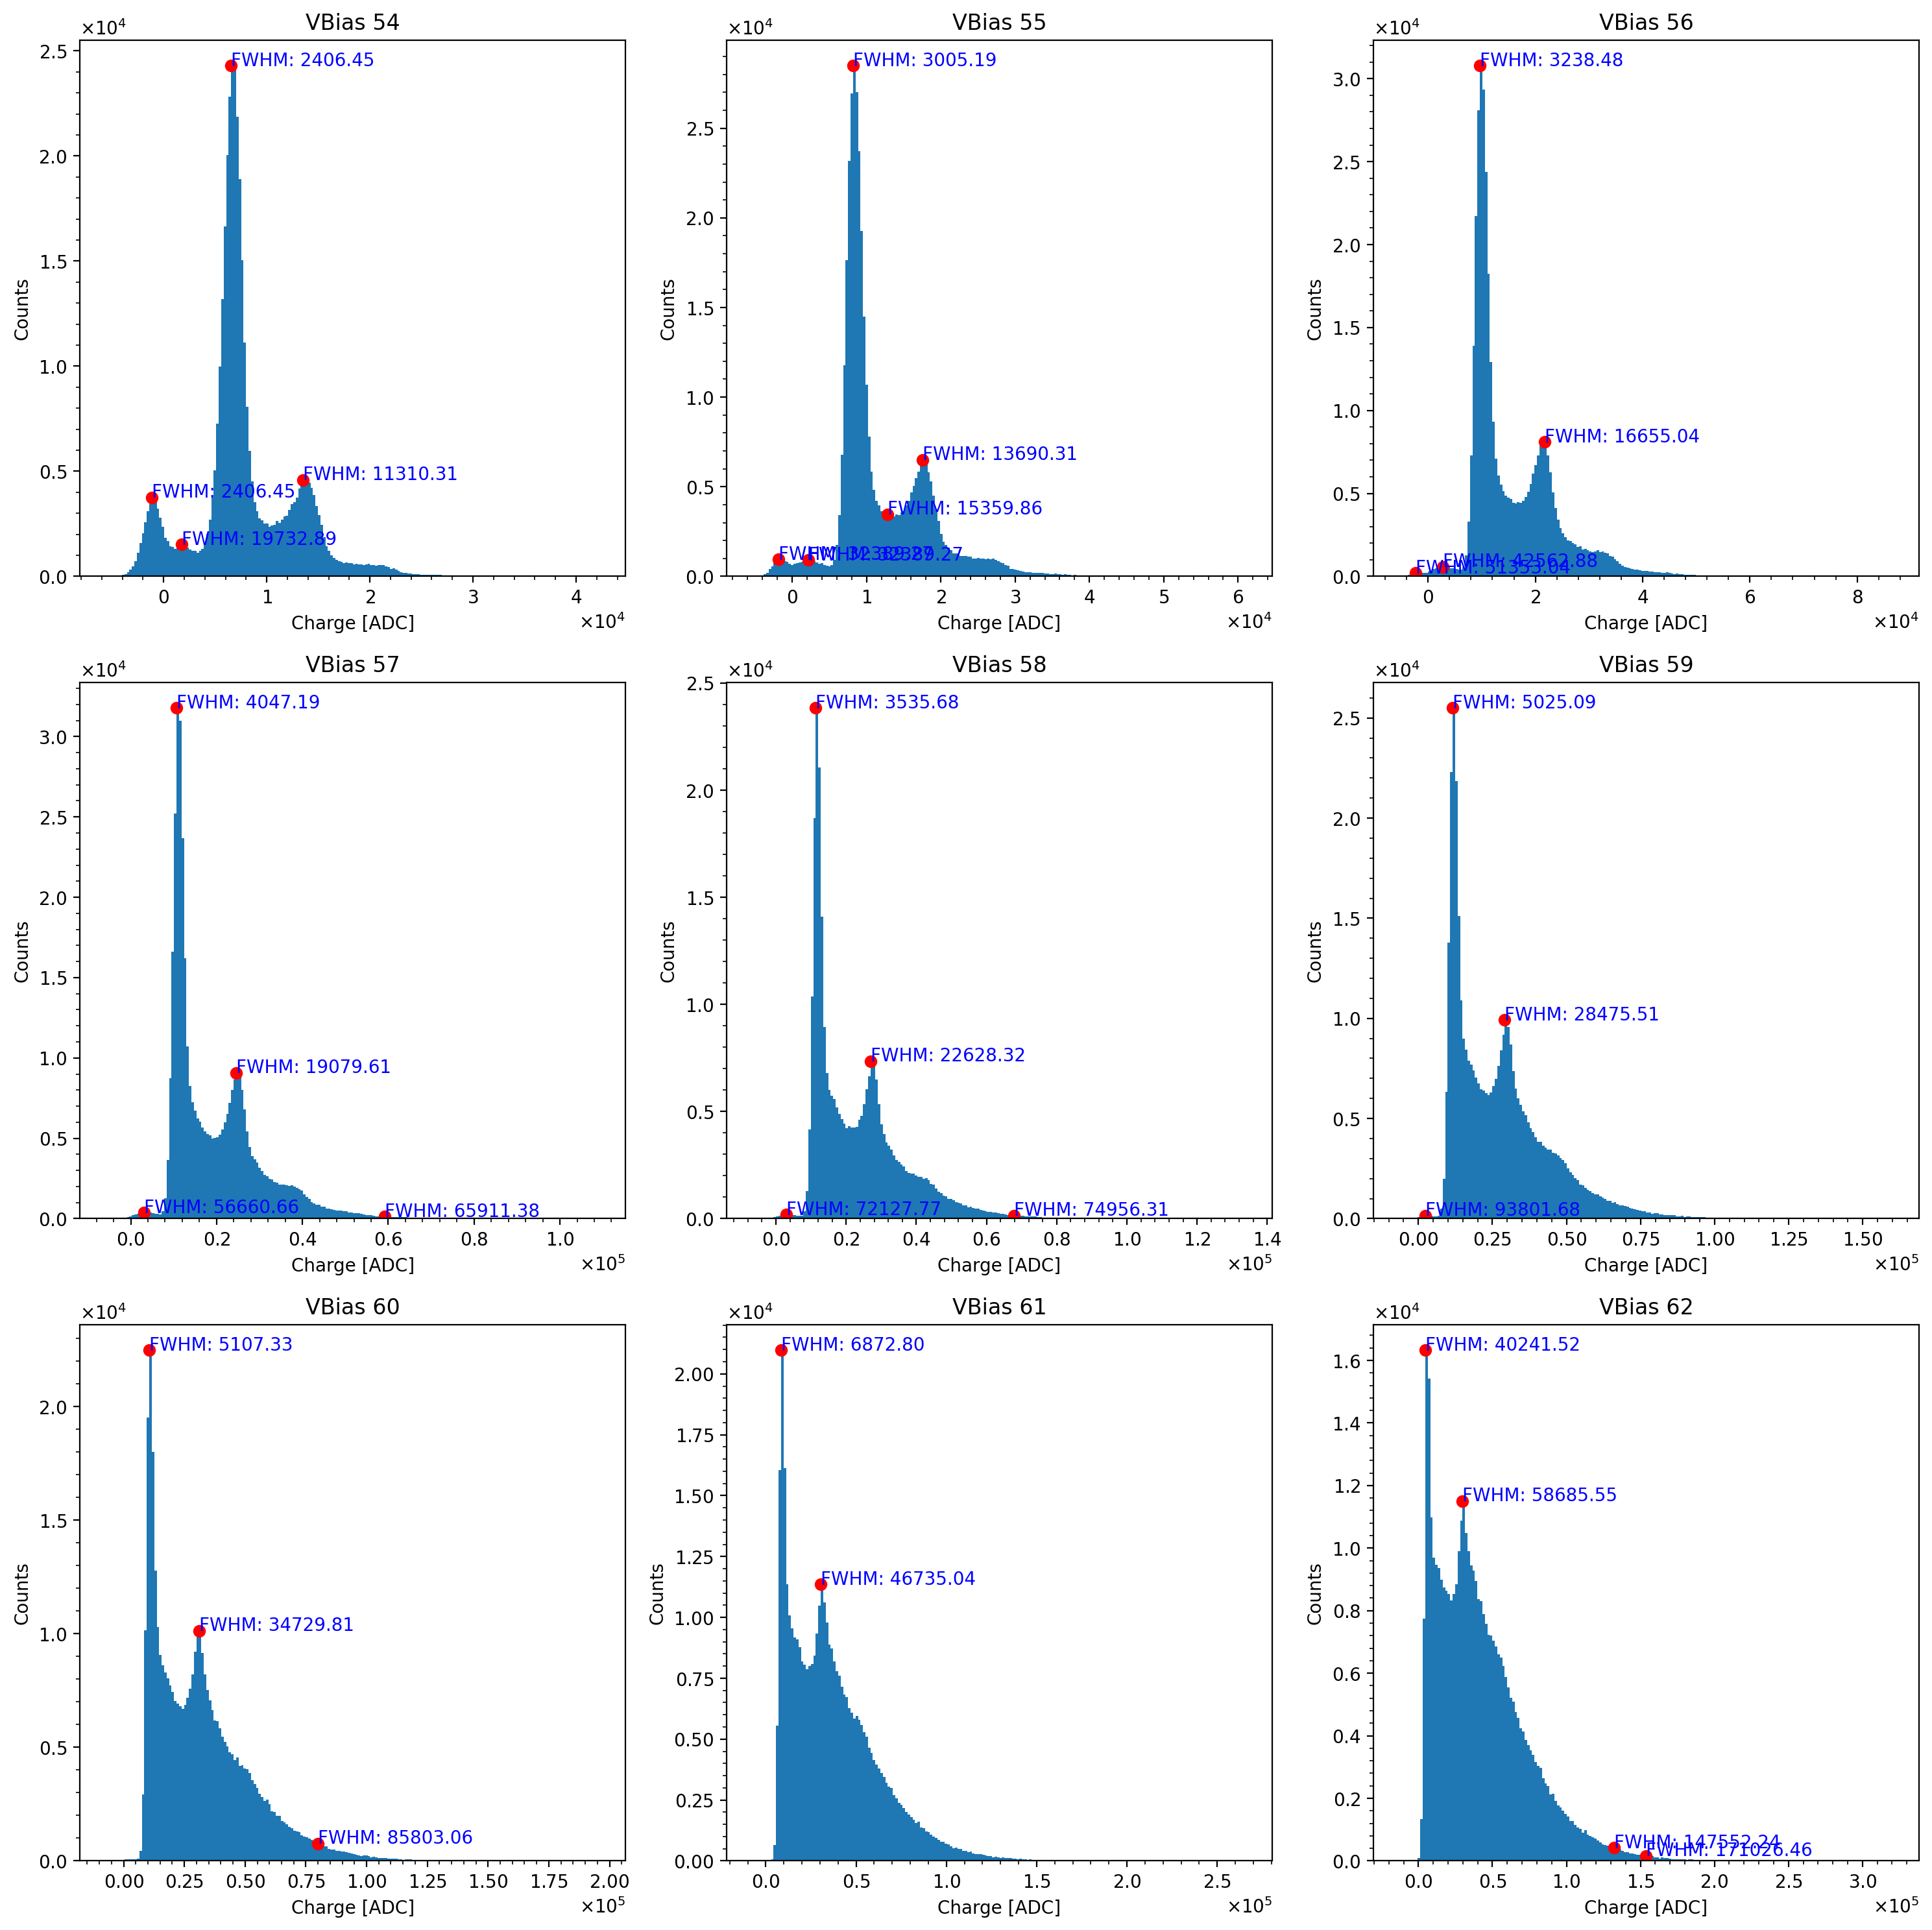

In [ ]:
import numpy as np
from pyDAW import scientific_tiker
from scipy.signal import find_peaks


def calculate_fwhm(counts, bins, peak_index):
    peak_value = counts[peak_index]
    half_max = peak_value / 2

    # 在左边找到半峰值位置
    left_idx = np.where(counts[:peak_index] <= half_max)[0]
    if len(left_idx) > 0:
        left_boundary = bins[left_idx[-1]]
    else:
        left_boundary = bins[0]  # 若找不到，则默认最左边为边界

    # 在右边找到半峰值位置
    right_idx = np.where(counts[peak_index:] <= half_max)[0]
    if len(right_idx) > 0:
        right_boundary = bins[peak_index + right_idx[0]]
    else:
        right_boundary = bins[-1]  # 若找不到，则默认最右边为边界

    fwhm = right_boundary - left_boundary
    return fwhm


fig, axes = plt.subplots(3, 3, figsize=(15, 15))

hists = []
for j, waveform in enumerate(waveforms):
    row = j // 3
    col = j % 3
    ax = axes[row, col]

    # 计算直方图
    counts, bins, patches = ax.hist(-charges[j], bins=200)
    hist_peak, hist_peak2 = find_peaks(counts, distance=10, height=100, width=1, prominence=0.8)
    # 标注峰值位置
    hists.append([counts, bins, hist_peak])

    # 计算半峰宽
    fwhms = [calculate_fwhm(counts, bins, peak) for peak in hist_peak]

    # 标注峰的半峰宽
    for peak, fwhm in zip(hist_peak, fwhms):
        ax.plot(bins[peak], counts[peak], "ro", label="Peak")
        ax.text(bins[peak], counts[peak], f"FWHM: {fwhm:.2f}", color="blue")

    ax.set_xlabel("Charge [ADC]")
    ax.set_ylabel("Counts")
    ax.set_title(f"VBias {54 + j}")

scientific_tiker([ax for ax in axes.flatten()])
plt.tight_layout()
plt.show()

In [ ]:
def calculate_fwhm(waveform, peaks):
    """
    计算波形的半峰宽 (FWHM)。

    参数：
    waveform (np.ndarray): 波形数据。
    peaks (np.ndarray): 峰值位置的索引。

    返回：
    list: 包含每个峰值的 FWHM 的列表。
    """

    fwhm_values = []
    for peak in peaks:
        peak_height = waveform[peak]
        half_max = peak_height / 2

        # 向左搜索半峰值位置
        left_idx = (waveform[:peak] < half_max).nonzero()[0]
        if len(left_idx) > 0:
            left_idx = left_idx[-1]
        else:
            left_idx = 0  # 如果没有找到，则设置为起始位置

        # 向右搜索半峰值位置
        right_idx = (waveform[peak:] < half_max).nonzero()[0]
        if len(right_idx) > 0:
            right_idx = right_idx[0] + peak
        else:
            right_idx = len(waveform) - 1  # 如果没有找到，则设置为结束位置

        fwhm = right_idx - left_idx
        fwhm_values.append(fwhm)

    return fwhm_values

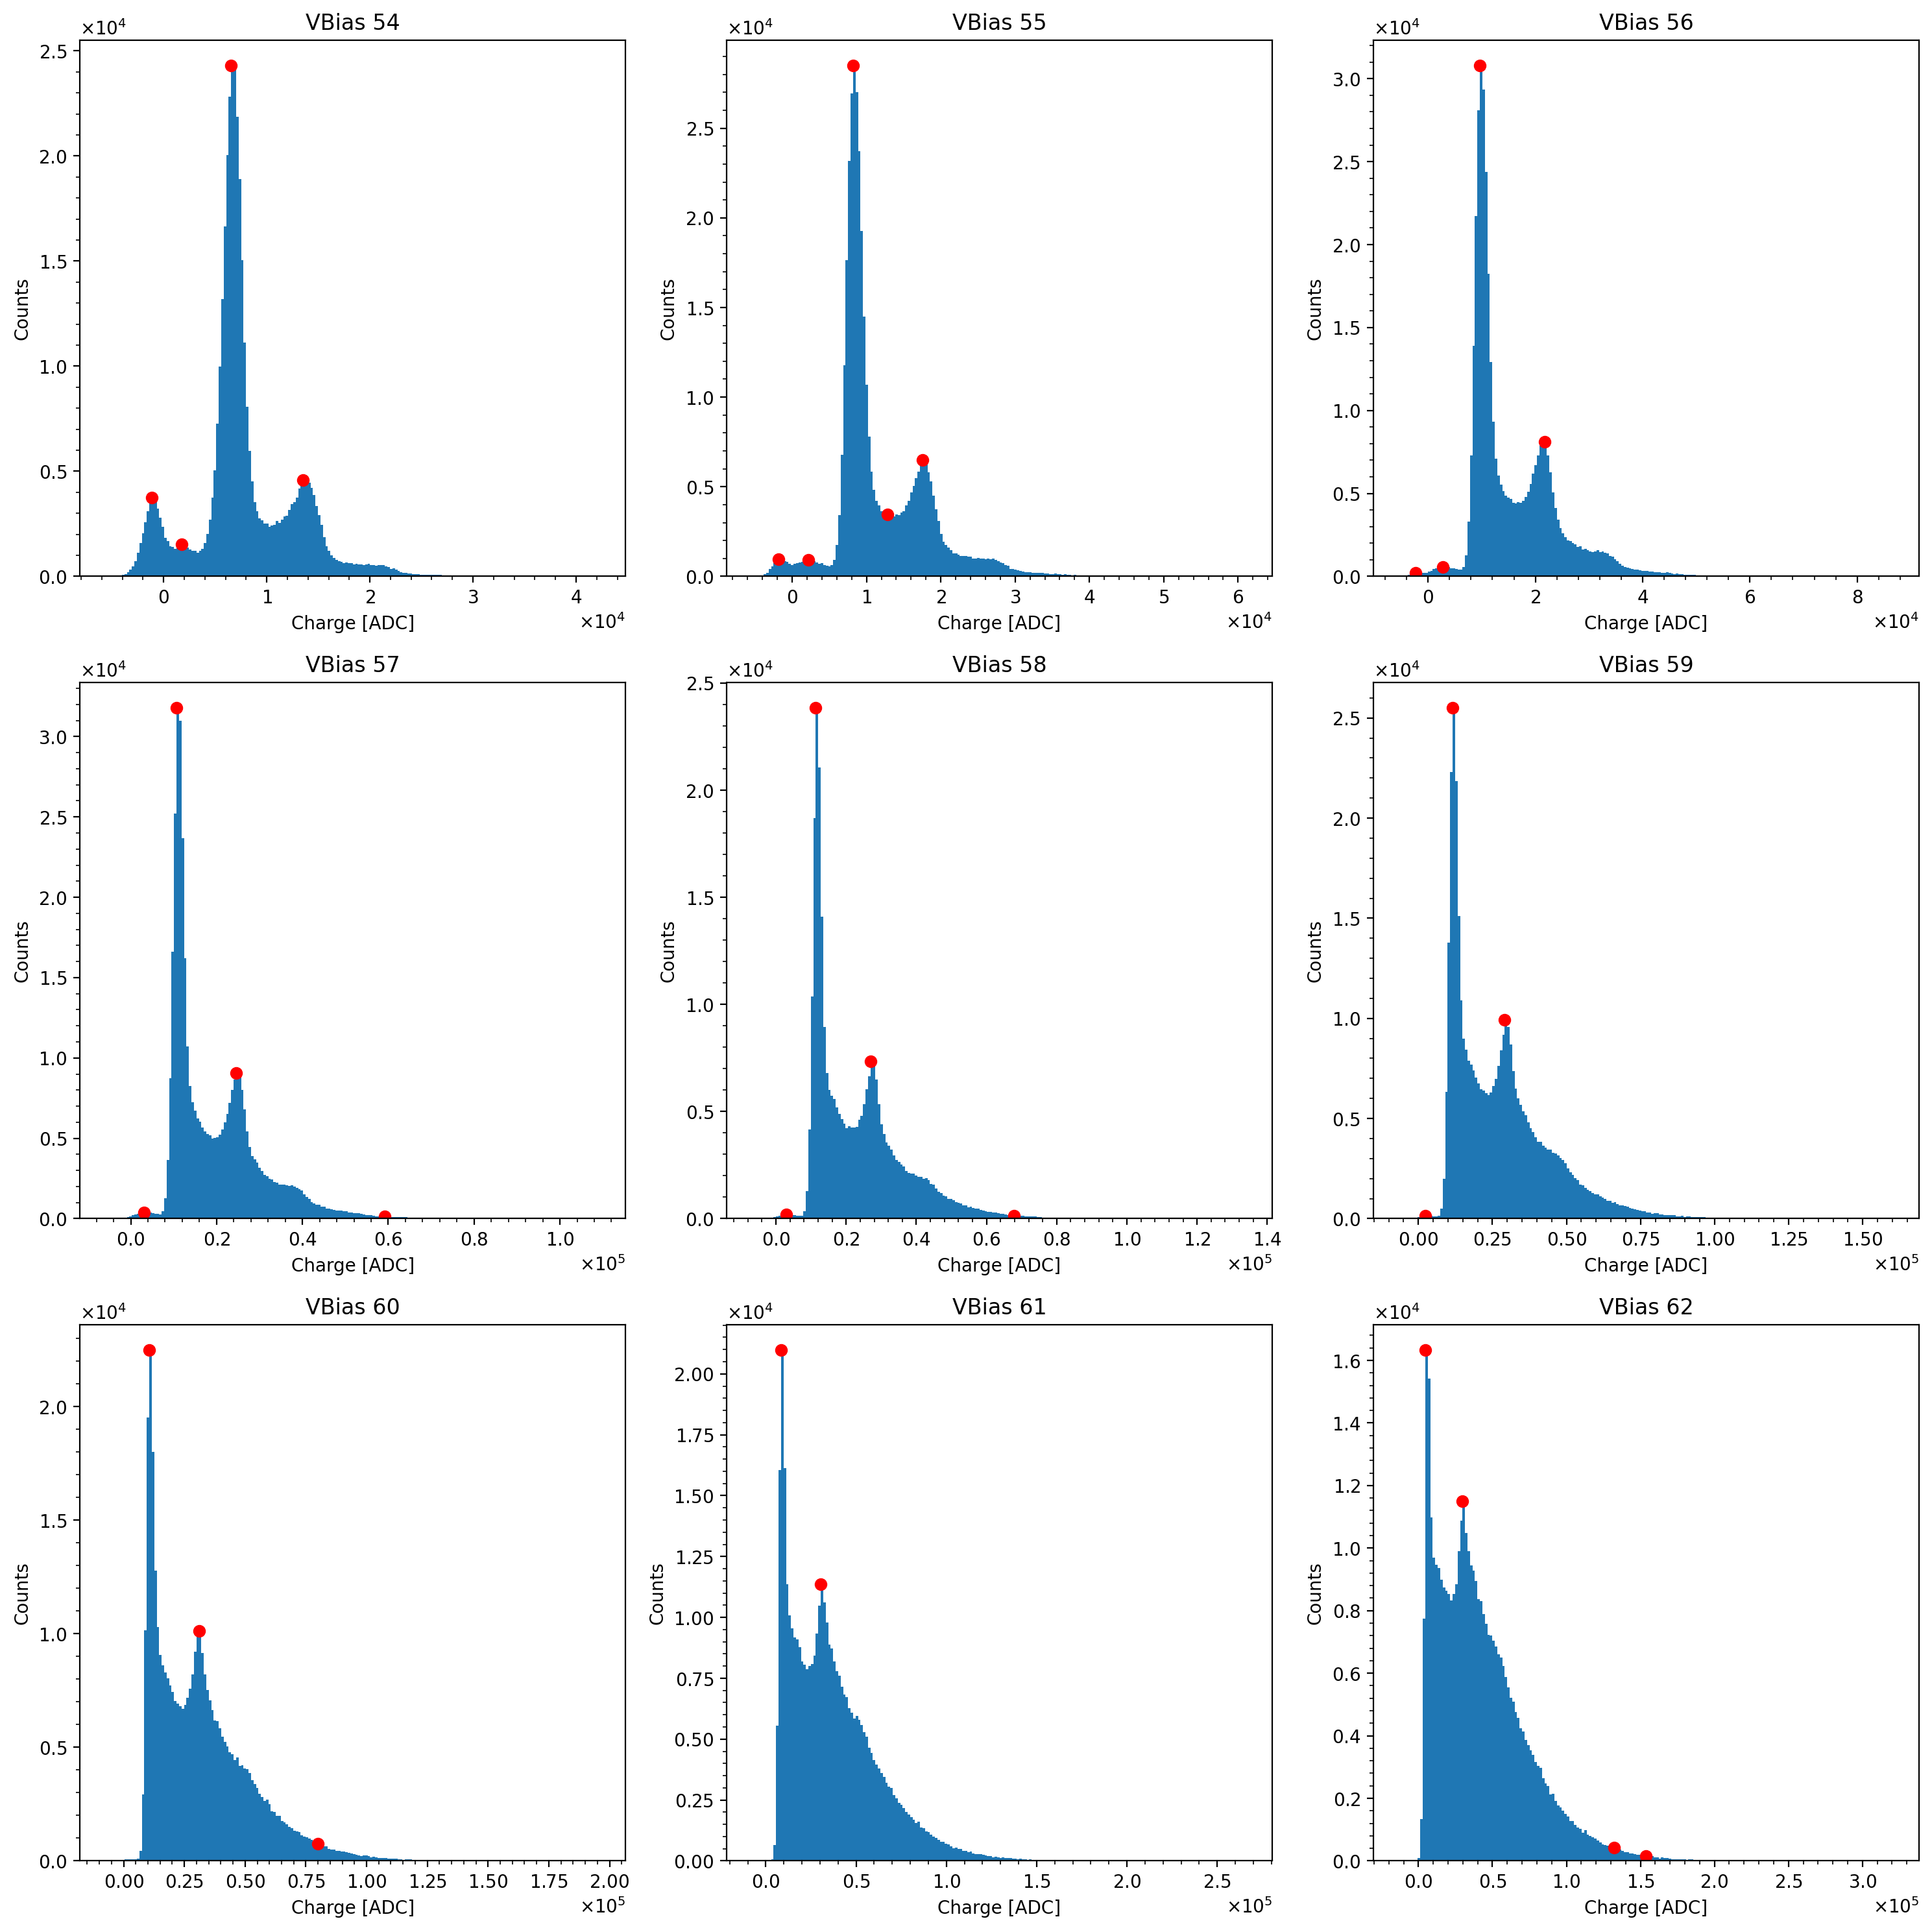

In [ ]:
import matplotlib.pyplot as plt
from pyDAW import scientific_tiker
from scipy.signal import find_peaks

fig, axes = plt.subplots(3, 3, figsize=(15, 15))


hists = []
for j, waveform in enumerate(waveforms):
    row = j // 3
    col = j % 3
    ax = axes[row, col]

    # 计算直方图
    counts, bins, patches = ax.hist(-charges[j], bins=200)
    hist_peak, hist_peak2 = find_peaks(counts, distance=10, height=100, width=1, prominence=0.8)
    # 标注峰值位置
    hists.append([counts, bins, hist_peak])
    ax.plot(bins[hist_peak], counts[hist_peak], "ro", label="Peaks")

    ax.set_xlabel("Charge [ADC]")
    ax.set_ylabel("Counts")
    ax.set_title(f"VBias {54 + j}")

scientific_tiker([ax for ax in axes.flatten()])
plt.tight_layout()
plt.show()

In [ ]:
(hists[1][1][-1] - hists[1][1][0]) / len(hists[1][1])

In [ ]:
idx = 1

### 拟合得到峰值


###


In [ ]:
# hists.append([counts, bins, hist_peak])
# ax.plot(bins[hist_peak], counts[hist_peak], "ro", label="Peaks")


def get_two_highest_peaks(counts, bins, hist_peak):
    # Compute the histogram bin centers
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Get the counts at the peak indices (found earlier)
    peak_values = counts[hist_peak]

    # Identify the indices of the two highest peaks
    top_two_idx = np.argsort(peak_values)[::-1][:2]  # indices in the hist_peak array

    # Get the corresponding peak positions on the x-axis

    error = calculate_fwhm(counts, hist_peak)

    top_2_error = np.array(error)[top_two_idx]
    top_two_x = bin_centers[hist_peak[top_two_idx]]

    print("The x-axis values of the two highest peaks are:", top_two_x)

    print("The FWHM of the two highest peaks are:", top_2_error)

    return (top_two_x, top_2_error)


best_values = []
errors = []
for hist in hists:
    # Each hist is a list: [counts, bins, hist_peak]
    best_value, error = get_two_highest_peaks(hist[0], hist[1], hist[2])
    best_values.append(best_value)
    bin_size = (hist[1][-1] - hist[1][0]) / len(hist[1])
    error = error * bin_size
    errors.append(error)


best_values

The x-axis values of the two highest peaks are: [ 6665.66408337 13644.36908337]
The FWHM of the two highest peaks are: [10 47]
The x-axis values of the two highest peaks are: [ 8356.58053894 17706.06053894]
The FWHM of the two highest peaks are: [ 9 41]
The x-axis values of the two highest peaks are: [ 9890.50989737 21919.14989737]
The FWHM of the two highest peaks are: [ 7 36]
The x-axis values of the two highest peaks are: [10958.92826184 24835.00826184]
The FWHM of the two highest peaks are: [ 7 33]
The x-axis values of the two highest peaks are: [11698.29923974 27255.26923974]
The FWHM of the two highest peaks are: [ 5 32]
The x-axis values of the two highest peaks are: [11974.24010344 29562.05510344]
The FWHM of the two highest peaks are: [ 6 34]
The x-axis values of the two highest peaks are: [11047.52339908 31476.82339908]
The FWHM of the two highest peaks are: [ 5 34]
The x-axis values of the two highest peaks are: [ 9113.15302478 31106.11302478]
The FWHM of the two highest pea

[array([ 6665.66408337, 13644.36908337]),
 array([ 8356.58053894, 17706.06053894]),
 array([ 9890.50989737, 21919.14989737]),
 array([10958.92826184, 24835.00826184]),
 array([11698.29923974, 27255.26923974]),
 array([11974.24010344, 29562.05510344]),
 array([11047.52339908, 31476.82339908]),
 array([ 9113.15302478, 31106.11302478]),
 array([ 5454.22838178, 30605.17838178])]

In [ ]:
errors

[]

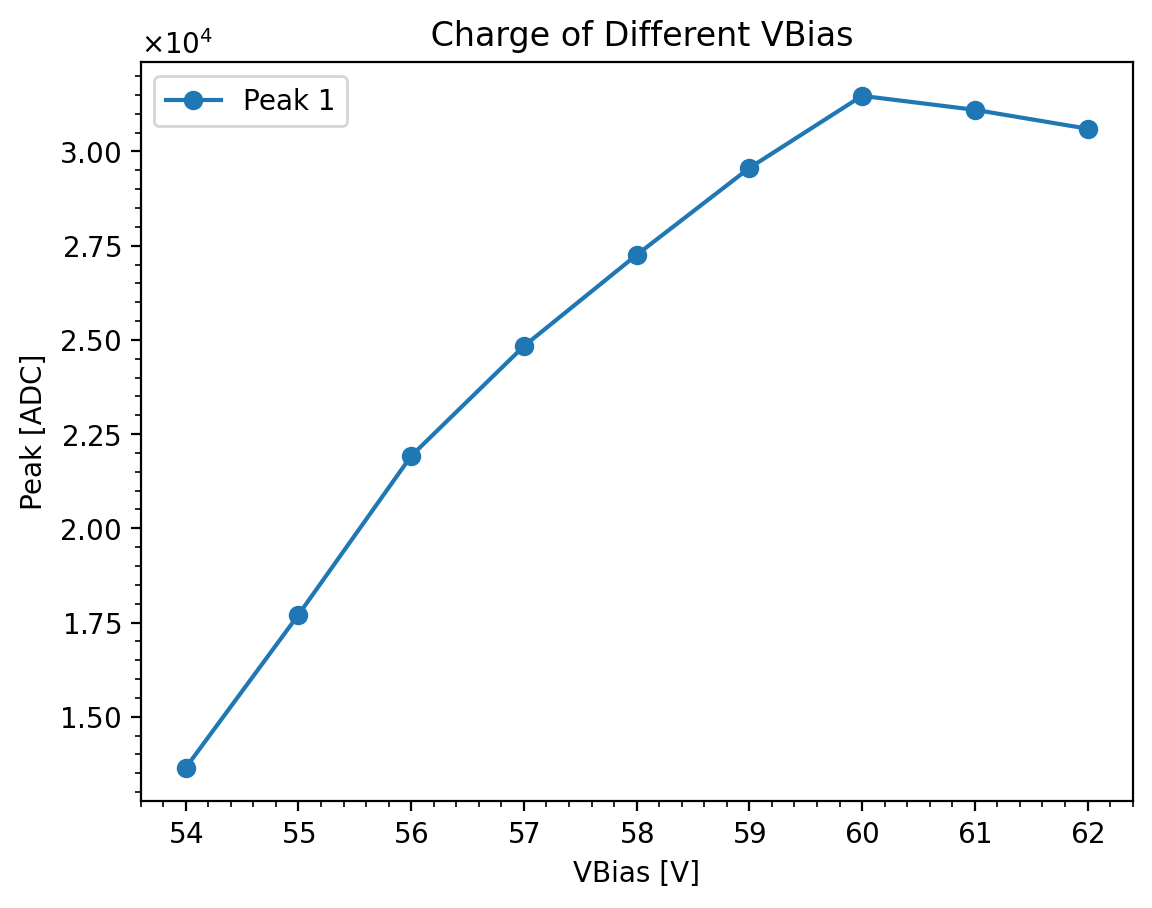

In [ ]:
best_values1 = np.array(best_values)


x = best_values1[:, 1][:]

plt.plot(54 + np.arange(len(x)), x, "o-", label="Peak 1")

# plt.errorbar(
#     54 + np.arange(len(x)),
#     x,
#     yerr=np.array(errors)[: len(x), 1],
#     fmt="o",
#     label="Peak 1 Error",
# )


# 设置坐标轴标签和标题
plt.xlabel("VBias [V]")
plt.ylabel("Peak [ADC]")
plt.title(" Charge of Different VBias")

scientific_tiker([plt.gca()])
# 添加图例
plt.legend()

In [ ]:
%config InlineBackend.figure_format = 'retina'

<>:60: SyntaxWarning: invalid escape sequence '\s'
<>:60: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_151706/3115002000.py:60: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_ylabel("Residual ($\sigma$)")


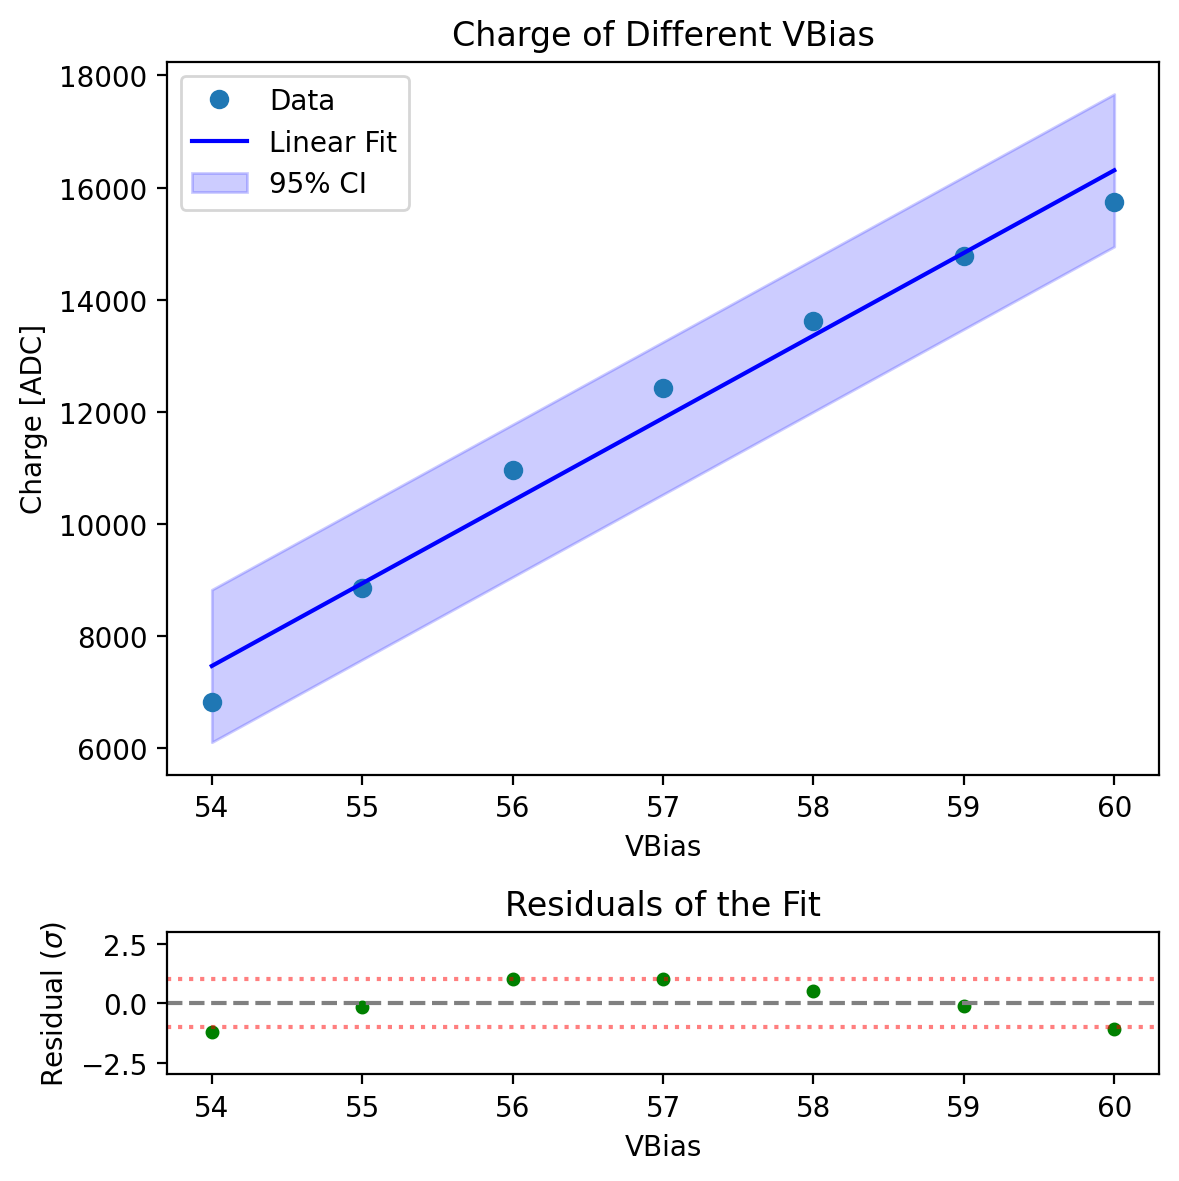

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from scipy import stats

# 假设 best_values1 已经定义
best_values1 = np.array(best_values)

# 提取 x 和 y 数据
x_data = 54 + np.arange(len(best_values1[:, 1][:-2]))
y_data = best_values1[:, 1][:-2] / 2

# 进行线性拟合
coefficients = np.polyfit(x_data, y_data, 1)  # 1 表示线性拟合
polynomial = np.poly1d(coefficients)

# 生成拟合曲线
x_fit = np.linspace(x_data.min(), x_data.max(), 100)
y_fit = polynomial(x_fit)

# 计算预测值和残差
y_predicted = polynomial(x_data)
residuals = y_data - y_predicted

# 计算残差的标准差
std_err = np.sqrt(np.sum(residuals**2) / (len(x_data) - 2))

# 计算置信区间
alpha = 0.05  # 显著性水平
n = len(x_data)  # 样本数量
dof = n - 2  # 自由度
t = stats.t.ppf(1 - alpha / 2, dof)  # t 值

# 计算置信带的上下界
y_upper = y_fit + t * std_err
y_lower = y_fit - t * std_err

# 创建一个2行1列的子图布局，高度比例为3:1
fig = plt.figure(figsize=(6, 6))
gs = GridSpec(2, 1, height_ratios=[5, 1])

# 主图 - 数据、拟合曲线和置信区间
ax1 = fig.add_subplot(gs[0])
ax1.plot(x_data, y_data, "o", label="Data")
ax1.plot(x_fit, y_fit, "b-", label="Linear Fit")
ax1.fill_between(x_fit, y_lower, y_upper, color="blue", alpha=0.2, label="95% CI")
ax1.set_xlabel("VBias")
ax1.set_ylabel("Charge [ADC]")
ax1.set_title("Charge of Different VBias")
ax1.legend()

# 残差图（标准化为σ单位）
ax2 = fig.add_subplot(gs[1], sharex=ax1)
residuals_sigma = residuals / std_err  # 标准化残差
ax2.plot(x_data, residuals_sigma, "o", color="green", markersize=4)
ax2.axhline(0, color="gray", linestyle="--", label="Zero Residual")
ax2.axhline(1, color="red", linestyle=":", alpha=0.5)
ax2.axhline(-1, color="red", linestyle=":", alpha=0.5)
ax2.set_xlabel("VBias")
ax2.set_ylabel("Residual ($\sigma$)")
ax2.set_title("Residuals of the Fit")
ax2.set_ylim(-3, 3)  # 显示±3σ范围
# ax2.legend()

plt.tight_layout()
plt.show()

增益 (Gain): 1474.03 ADC/VBias
截距 (Intercept): -72133.87 ADC


<>:68: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_151706/2629803406.py:68: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_ylabel("Residual ($\sigma$)")


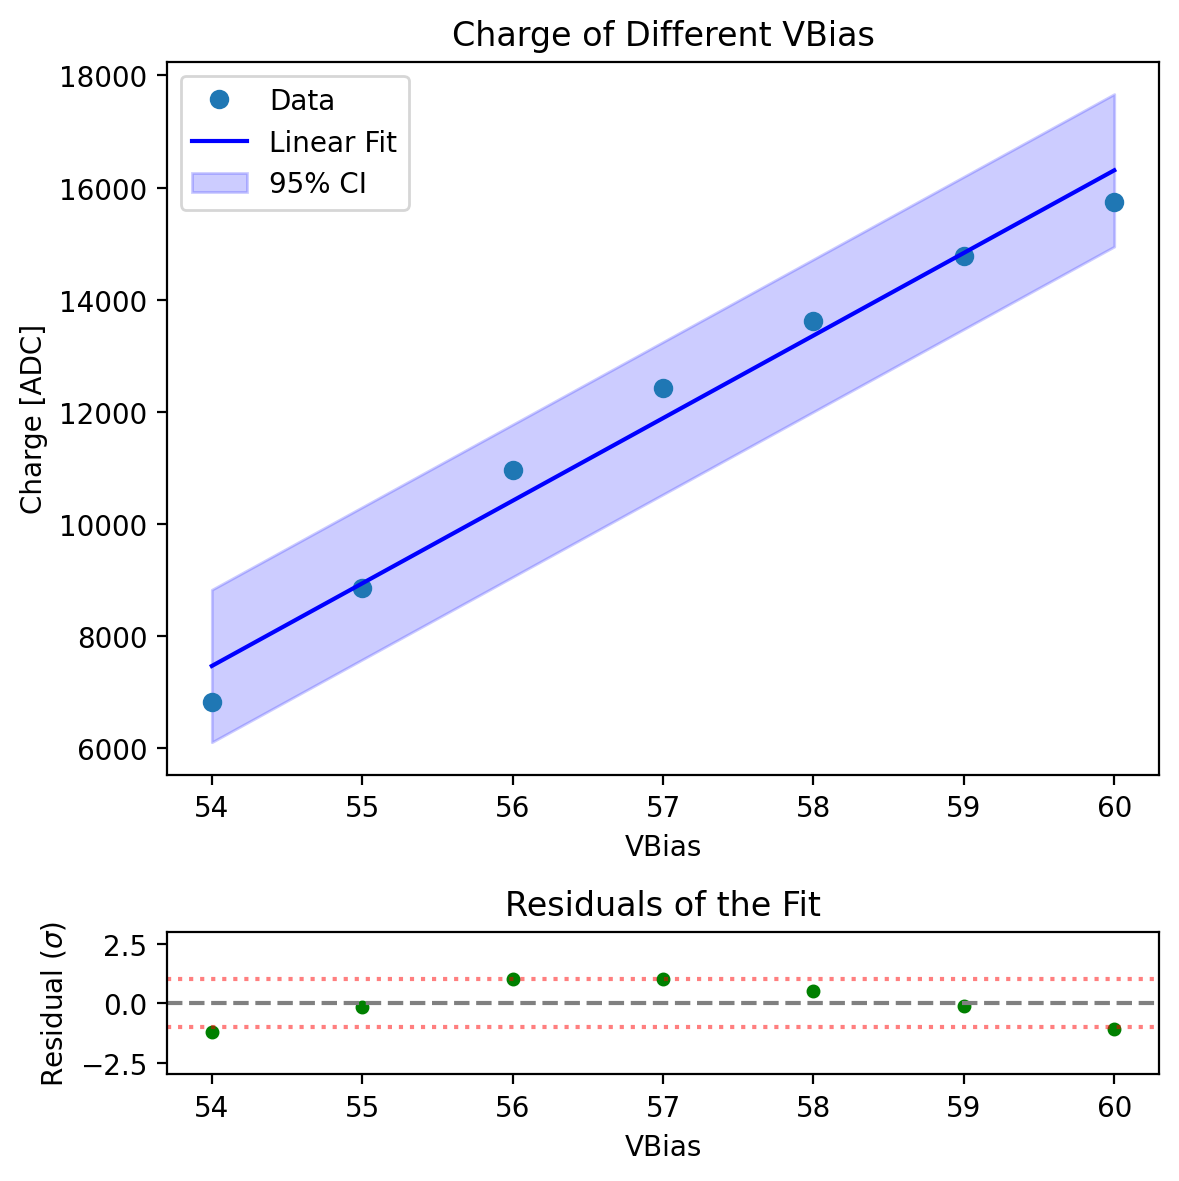

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from scipy import stats

# 假设 best_values1 已经定义
best_values1 = np.array(best_values)

# 提取 x 和 y 数据
x_data = 54 + np.arange(len(best_values1[:, 1][:-2]))
y_data = best_values1[:, 1][:-2] / 2

# 进行线性拟合
coefficients = np.polyfit(x_data, y_data, 1)  # 1 表示线性拟合
polynomial = np.poly1d(coefficients)

# 提取增益（斜率）和截距
gain = coefficients[0]
intercept = coefficients[1]

# 打印增益和截距
print(f"增益 (Gain): {gain:.2f} ADC/VBias")
print(f"截距 (Intercept): {intercept:.2f} ADC")

# 生成拟合曲线
x_fit = np.linspace(x_data.min(), x_data.max(), 100)
y_fit = polynomial(x_fit)

# 计算预测值和残差
y_predicted = polynomial(x_data)
residuals = y_data - y_predicted

# 计算残差的标准差
std_err = np.sqrt(np.sum(residuals**2) / (len(x_data) - 2))

# 计算置信区间
alpha = 0.05  # 显著性水平
n = len(x_data)  # 样本数量
dof = n - 2  # 自由度
t = stats.t.ppf(1 - alpha / 2, dof)  # t 值

# 计算置信带的上下界
y_upper = y_fit + t * std_err
y_lower = y_fit - t * std_err

# 创建一个2行1列的子图布局，高度比例为3:1
fig = plt.figure(figsize=(6, 6))
gs = GridSpec(2, 1, height_ratios=[5, 1])

# 主图 - 数据、拟合曲线和置信区间
ax1 = fig.add_subplot(gs[0])
ax1.plot(x_data, y_data, "o", label="Data")
ax1.plot(x_fit, y_fit, "b-", label="Linear Fit")
ax1.fill_between(x_fit, y_lower, y_upper, color="blue", alpha=0.2, label="95% CI")
ax1.set_xlabel("VBias")
ax1.set_ylabel("Charge [ADC]")
ax1.set_title("Charge of Different VBias")
ax1.legend()

# 残差图（标准化为σ单位）
ax2 = fig.add_subplot(gs[1], sharex=ax1)
residuals_sigma = residuals / std_err  # 标准化残差
ax2.plot(x_data, residuals_sigma, "o", color="green", markersize=4)
ax2.axhline(0, color="gray", linestyle="--", label="Zero Residual")
ax2.axhline(1, color="red", linestyle=":", alpha=0.5)
ax2.axhline(-1, color="red", linestyle=":", alpha=0.5)
ax2.set_xlabel("VBias")
ax2.set_ylabel("Residual ($\sigma$)")
ax2.set_title("Residuals of the Fit")
ax2.set_ylim(-3, 3)  # 显示±3σ范围
# ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
from pyDAW import scientific_tiker

fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for j, waveform in enumerate(waveforms):
    row = j // 3
    col = j % 3
    ax = axes[row, col]

    ax.hist(-peaks[j], bins=200)

    ax.set_xlabel("Peak [ADC]")
    ax.set_ylabel("Counts")
    ax.set_title(f"VBias {54 + j}")

scientific_tiker([ax for ax in axes.flatten()])
plt.tight_layout()
plt.show()

In [ ]:
%config InlineBackend.figure_format = 'retina'
from pyDAW import scientific_tiker

fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for j, waveform in enumerate(waveforms):
    row = j // 3
    col = j % 3
    ax = axes[row, col]

    ax.hist2d(-peaks[j], -charges[j], bins=200, norm=LogNorm())

    ax.set_xlabel("Peak [ADC]")
    ax.set_ylabel("Charge [ADC]")
    ax.set_title(f"VBias {54 + j}")


plt.xlim()
scientific_tiker([ax for ax in axes.flatten()])
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, waveform in enumerate(waveforms):
    random = [np.random.randint(0, len(waveform)) for _ in range(10)]
    ax = axes[i // 3, i % 3]
    for j in random:
        ax.plot(waveform[j, 7:].T, alpha=0.5, label=f"Waveform {j}")
    # ax.legend()
    ax.set_title(f"VBias {54 + i}")
    ax.set_xlabel("Time [2*ns]")
    ax.set_ylabel("ADC")


plt.tight_layout()
plt.show()

In [ ]:
import glob

import pandas as pd

csv_files = glob.glob("/home/daq/daq_2730/CoMPASS-v2.4.1/SiPM_VUV4/DAQ/VBias57/RAW/*.CSV")
dataframes = [pd.read_csv(file, delimiter=";", skiprows=1) for file in csv_files[:3]]

# 将所有 DataFrame 合并成一个
combined_dataframe = pd.concat(dataframes, ignore_index=True)

In [ ]:
waveform = combined_dataframe.to_numpy()

In [ ]:
import numpy

charge = charges[1]

### 通过拟合的方法得到中值


In [ ]:
import math

import numpy as np
from pyDAW import BaseFitter

test = None


class MultiGaussFitter(BaseFitter):
    def __init__(self, x, y, fit_range, param):
        super().__init__(x, y, fit_range, param)

    def fit_func(self, x, *params):
        num_gaussians = len(params) // 3
        gaussians = [
            params[3 * i + 2] * np.exp(-((x - params[3 * i]) ** 2) / (2 * params[3 * i + 1] ** 2))
            for i in range(num_gaussians)
        ]

        return np.sum(gaussians, axis=0)

    def set_limits(self, minuit):
        minuit.limits = [
            (8.3e3, 8.7e3),  # mpv 的限制
            (980.2, 990),  # eta 的下限
            (10.04e3 - 0.4e3, 11.04e3 - 0.4e3),
            (17.567e3 - 10 * 0.017e3, 17.567e3 + 100 * 0.017e3),
            (1.472e3 - 0.1e3, 1.472e3 + 0.1e3),
            (1.8e3, 1.7e3 + 1e3),
            (25e3, 30e3),
            (0, 10e3),
            (100, 1300),
        ]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bins_plot = np.linspace(0, 5e4, 400)
bin, edge = np.histogram(-charge, bins=bins_plot)
center = edge[:-1] + np.diff(edge) / 2

plt.plot(center, bin, label="Charge")


# 创建 MultiGaussFitter 实例并进行拟合
fitter = MultiGaussFitter(
    center,
    bin,
    fit_range=[5000, 50000],
    param=[8.460e3, 1000, 10.04e3, 17.613e3, 1e3, 2e3, 26e3, 10e3, 700],
)

value, err = fitter.fit()
plt.plot(center, fitter.fit_func(center, *value), label="Fit")

In [ ]:
fitter.m

In [ ]:
6.553e3 * 2

In [ ]:
fitter.m

In [ ]:
np.exp(test[3])

In [ ]:
class LandauGaussFitter(BaseFitter):
    def __init__(self, x, y, fit_range, param):
        super().__init__(x, y, fit_range, param)
        self.mpv = param[0]

    def fit_func(self, x, mpv, eta, sigma):
        """
        Landau-Gauss 分布的具体实现
        """
        xi = (x - mpv) / eta
        landau_part = np.exp(-0.5 * (xi + np.exp(-xi))) / eta
        gauss_part = np.exp(-0.5 * ((x - mpv) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))
        return landau_part * gauss_part

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# 假设 combined_dataframe 已经定义并转换为 NumPy 数组
# 例如：waveform = combined_dataframe.to_numpy()

# 生成示例波形数据
waveform = np.sin(np.linspace(0, 10 * np.pi, 1000)) + np.random.normal(0, 0.1, 1000)

# 找到峰值
peaks, _ = find_peaks(waveform, height=10)  # height 参数可以调整以找到合适的峰值

# 打印峰值索引
print("峰值索引:", peaks)

# 可视化波形和峰值
plt.plot(waveform)
plt.plot(peaks, waveform[peaks], "x")
plt.title("Waveform and Peaks")
plt.show()

In [ ]:
plt.hist((waveforms[0][:10000, 7:10].flatten() - 8192) ** 2, bins=200, alpha=0.2)
plt.hist((waveforms[1][:10000, 7:10].flatten() - 8192) ** 2, bins=200, alpha=0.2)
plt.hist((waveforms[2][:10000, 7:10].flatten() - 8192) ** 2, bins=200, alpha=0.2)
plt.hist((waveforms[3][:10000, 7:10].flatten() - 8192) ** 2, bins=200, alpha=0.2)


plt.xlim(0, 2e5)
plt.show()

## 计算功率谱


In [ ]:
# 加载白噪声数据
df = pd.read_csv(
    "/home/daq/daq_2730/CoMPASS-v2.4.1/SiPM_VUV4/DAQ/WhiteNoise/RAW/DataR_CH0@VX2730_53013_WhiteNoise.CSV",
    delimiter=";",
    skiprows=1,
)
wave_white = df.to_numpy()

In [ ]:
2**13

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot((wave_white[:1000, 7 : 7 + 50]).T - 8000)
ax[1].plot(waveforms[0][:1000, 7 : 7 + 50].T - 8000)
[axx.set_ylim(-300, 300) for axx in ax]

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 wave_white 和 waveforms 已经定义并且是有效数据
waveform_data = wave_white[:1000, 7 : 7 + 50]  # 这里选择一个波形片段进行分析
waveform_data_2 = waveforms[0][:1000, 7 : 7 + 50]  # 另一个波形

# 计算傅里叶变换
fft_data = np.fft.fft(waveform_data, axis=0)  # 沿着每一列（每个波形片段）进行傅里叶变换
fft_data_2 = np.fft.fft(waveform_data_2, axis=0)

# 计算功率谱（幅度的平方）
power_spectrum = np.abs(fft_data) ** 2
power_spectrum_2 = np.abs(fft_data_2) ** 2

# 计算对应的频率轴
sampling_rate = 1  # 这里假设采样率为 1，实际应用中根据你的数据调整采样率
frequencies = np.fft.fftfreq(waveform_data.shape[0], d=sampling_rate)

# 只取正频率部分（功率谱是对称的）
positive_freqs = frequencies[: waveform_data.shape[0] // 2]
power_spectrum_positive = power_spectrum[: waveform_data.shape[0] // 2]
power_spectrum_positive_2 = power_spectrum_2[: waveform_data_2.shape[0] // 2]

# 绘制波形和其功率谱
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# 绘制波形
ax[0].plot(waveform_data.T - 8000)
ax[0].set_ylim(-300, 300)
ax[0].set_title("Waveform with Amp")

ax[1].plot(waveform_data_2.T - 8000)
ax[1].set_ylim(-300, 300)
ax[1].set_title("Waveform with Amp")

plt.figure(figsize=(15, 5))

# 绘制功率谱
plt.subplot(1, 2, 1)
plt.plot(positive_freqs, np.mean(power_spectrum_positive, axis=1))
plt.title("Power Spectrum with Amp")
plt.xlabel("Frequency (Hz)")
plt.yscale("log")
plt.ylabel("Power")
plt.xscale("log")
plt.subplot(1, 2, 2)
plt.plot(positive_freqs, np.mean(power_spectrum_positive_2, axis=1))
plt.title("Power Spectrum without Amp")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

NS = 1e-9

# 假设 waveforms 是一个包含信号数据的数组
# 这里我们生成一个示例 waveforms 数组

fs = 1  # 采样频率，假设为1000 Hz
t = np.arange(0, 50) / fs  # 时间向量，长度为50的信号
signal = waveforms[0][1, 7 : 7 + 50]  # 从 waveforms 中提取一个信号段

# 计算傅里叶变换
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1 / fs)

# 计算功率谱密度
psd = np.abs(fft_result) ** 2 / len(signal)

# 只取正频率部分
positive_frequencies = frequencies[: len(frequencies) // 2]
positive_psd = psd[: len(psd) // 2]

# 绘制功率谱密度
plt.figure()
plt.plot(positive_frequencies, positive_psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.title("Power Spectral Density")
plt.show()

In [ ]:
plt.hist(-(wave_white[:10000, 7:].flatten() - 8000), bins=30, alpha=0.2, density=True)
plt.hist(-(waveforms[0][:10000, 7 : 7 + 50].flatten() - 8000), bins=30, alpha=0.2, density=True)